# Machine-learning analysis - Balanced dataset - Total patients - Hugo and Variant type - p-value < 0.05

In [2]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

import seaborn as sns
import os
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np

import sklearn
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score
from sklearn.metrics import make_scorer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV
import shap
from sklearn.metrics import confusion_matrix
#from sklearn.metrics import plot_confusion_matrix
from sklearn.svm import SVC

In [3]:
os.chdir("C:/Users/Cristina/OneDrive/Documenti/BCG/Tesi/Occurrence matrix data_definitivo")

In [4]:
# load the occurrence matrix 
occurrence_matrix_TNandNONTN_relgenes_p005 = pd.read_csv('Occurrence_Matrix_TNandNONTNrelgenes_pval005_withLabels_VARIANTCLASS_afterMutCLust_definitivo.csv', sep=None, engine='python')

# Set the first column as row indices
occurrence_matrix_TNandNONTN_relgenes_p005 = occurrence_matrix_TNandNONTN_relgenes_p005.set_index(occurrence_matrix_TNandNONTN_relgenes_p005.iloc[:, 0])
# Remove the name of the index column
occurrence_matrix_TNandNONTN_relgenes_p005 = occurrence_matrix_TNandNONTN_relgenes_p005.rename_axis(None, axis='index')
# Drop the first column from the DataFrame
occurrence_matrix_TNandNONTN_relgenes_p005 = occurrence_matrix_TNandNONTN_relgenes_p005.iloc[:, 1:]

occurrence_matrix_TNandNONTN_relgenes_p005

,TP53_Missense_Mutation_270_282,MAML3_In_Frame_Ins_503_503,PIK3CA_Missense_Mutation_1046_1047,TP53_Missense_Mutation_173_177,TP53_Missense_Mutation_236_258,GATA3_Frame_Shift_Ins_308_335,PIK3CA_Missense_Mutation_545_546,ERBB2_Missense_Mutation_767_777,GATA3_Splice_Site_308_335,TP53_Nonsense_Mutation_191_199,...,DNAJC9_Nonsense_Mutation_noClust,ACACB_Nonsense_Mutation_noClust,TACC3_Intron_noClust,CPEB1_Intron_noClust,EPG5_Splice_Site_noClust,KL_Frame_Shift_Del_noClust,PRPF38B_Nonsense_Mutation_noClust,TEX14_Splice_Site_noClust,EPAS1_Intron_noClust,Target
brca_smc_2018_BB01_002,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
brca_smc_2018_BB01_004,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
brca_smc_2018_BB01_005,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
brca_smc_2018_BB01_006,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
brca_smc_2018_BB01_008,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
MBCProject_xlhkS5CG,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
MBCProject_xoHAF6s8,0,0,0,0,0,0,0,0,0,0,...,0,0,1,1,1,1,0,0,0,0
MBCProject_yZSnSluK,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
MBCProject_ygcMFgCR,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,1,1,0,0


In [5]:
# SELECT THE PATIENTS

# Extract the row indices as a list
total_patient_indices = occurrence_matrix_TNandNONTN_relgenes_p005.index.tolist()
# Create a new DataFrame with the patient indices
total_patient_indices = pd.DataFrame({'Patient': total_patient_indices})
total_patient_indices

,Patient
0,brca_smc_2018_BB01_002
1,brca_smc_2018_BB01_004
2,brca_smc_2018_BB01_005
3,brca_smc_2018_BB01_006
4,brca_smc_2018_BB01_008
...,...
1503,MBCProject_xlhkS5CG
1504,MBCProject_xoHAF6s8
1505,MBCProject_yZSnSluK
1506,MBCProject_ygcMFgCR


### Study the intersection between these patients and the only cluster test patients

In [6]:
os.chdir("C:/Users/Cristina/OneDrive/Documenti/BCG/Tesi/Test_patients")
# load the test patients of the encoding 'only cluster'
onlyclusters_TNandNONTN_test_pts_p005 = pd.read_csv('Test_TNandNONTNpatients_only_clusters_p_005.txt', sep=',', engine='python')
onlyclusters_TNandNONTN_test_pts_p005

,Patient
0,TCGA-B6-A401
1,TCGA-B6-A0X5
2,TCGA-A2-A0D0
3,TCGA-A2-A0CL
4,TCGA-D8-A142
...,...
65,brca_smc_2018_BR371
66,brca_smc_2018_BB01_017
67,TCGA-A7-A0DB
68,brca_smc_2018_BB01_126


In [7]:
pd.merge(total_patient_indices, onlyclusters_TNandNONTN_test_pts_p005, how='inner', on=['Patient'])

,Patient
0,brca_smc_2018_BB01_017
1,brca_smc_2018_BB01_037
2,brca_smc_2018_BB01_110
3,brca_smc_2018_BB01_119
4,brca_smc_2018_BB01_126
...,...
65,MBC_204
66,MBCProject_LVSjf8h7
67,MBCProject_d5CbUNTb
68,MBCProject_oqupfDu7


All the patients in the onlyclusters dataset are present in the dataset under interest.

In [8]:
columns_with_all_zeros = (occurrence_matrix_TNandNONTN_relgenes_p005 == 0).all().sum()
columns_with_all_zeros

0

In [9]:
(occurrence_matrix_TNandNONTN_relgenes_p005 == 0).all().sum()

0

There are no rows and no columns with all zero values.

### Check if there are patients with no features (zero rows) and mutations not present in any patient (zero columns)

In [10]:
patient_target = occurrence_matrix_TNandNONTN_relgenes_p005[['Target']]
patient_target

,Target
brca_smc_2018_BB01_002,0
brca_smc_2018_BB01_004,1
brca_smc_2018_BB01_005,0
brca_smc_2018_BB01_006,0
brca_smc_2018_BB01_008,0
...,...
MBCProject_xlhkS5CG,0
MBCProject_xoHAF6s8,0
MBCProject_yZSnSluK,0
MBCProject_ygcMFgCR,0


In [11]:
occurrence_matrix_without_target = occurrence_matrix_TNandNONTN_relgenes_p005.drop('Target', axis=1)
occurrence_matrix_without_target

,TP53_Missense_Mutation_270_282,MAML3_In_Frame_Ins_503_503,PIK3CA_Missense_Mutation_1046_1047,TP53_Missense_Mutation_173_177,TP53_Missense_Mutation_236_258,GATA3_Frame_Shift_Ins_308_335,PIK3CA_Missense_Mutation_545_546,ERBB2_Missense_Mutation_767_777,GATA3_Splice_Site_308_335,TP53_Nonsense_Mutation_191_199,...,TEX14_Frame_Shift_Del_noClust,DNAJC9_Nonsense_Mutation_noClust,ACACB_Nonsense_Mutation_noClust,TACC3_Intron_noClust,CPEB1_Intron_noClust,EPG5_Splice_Site_noClust,KL_Frame_Shift_Del_noClust,PRPF38B_Nonsense_Mutation_noClust,TEX14_Splice_Site_noClust,EPAS1_Intron_noClust
brca_smc_2018_BB01_002,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
brca_smc_2018_BB01_004,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
brca_smc_2018_BB01_005,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
brca_smc_2018_BB01_006,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
brca_smc_2018_BB01_008,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
MBCProject_xlhkS5CG,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
MBCProject_xoHAF6s8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,1,1,1,0,0,0
MBCProject_yZSnSluK,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
MBCProject_ygcMFgCR,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,1,0


In [12]:
zero_rows = occurrence_matrix_without_target[(occurrence_matrix_without_target == 0).all(axis=1)]
zero_rows

,TP53_Missense_Mutation_270_282,MAML3_In_Frame_Ins_503_503,PIK3CA_Missense_Mutation_1046_1047,TP53_Missense_Mutation_173_177,TP53_Missense_Mutation_236_258,GATA3_Frame_Shift_Ins_308_335,PIK3CA_Missense_Mutation_545_546,ERBB2_Missense_Mutation_767_777,GATA3_Splice_Site_308_335,TP53_Nonsense_Mutation_191_199,...,TEX14_Frame_Shift_Del_noClust,DNAJC9_Nonsense_Mutation_noClust,ACACB_Nonsense_Mutation_noClust,TACC3_Intron_noClust,CPEB1_Intron_noClust,EPG5_Splice_Site_noClust,KL_Frame_Shift_Del_noClust,PRPF38B_Nonsense_Mutation_noClust,TEX14_Splice_Site_noClust,EPAS1_Intron_noClust


There aren't patients with zero mutations.

In [13]:
# separate the class 0 (non TN) from the class 1 (TN)

# class count
class_count_0, class_count_1 = occurrence_matrix_TNandNONTN_relgenes_p005['Target'].value_counts()

In [14]:
class_count_0

1217

In [15]:
class_count_1

291

In [16]:
# Separate class
class_0 = occurrence_matrix_TNandNONTN_relgenes_p005[occurrence_matrix_TNandNONTN_relgenes_p005['Target'] == 0]
class_1 = occurrence_matrix_TNandNONTN_relgenes_p005[occurrence_matrix_TNandNONTN_relgenes_p005['Target'] == 1] # print the shape of the class
print('Target 0 - Non TN:', class_0.shape)
print('Target 1 - TN:', class_1.shape)

Target 0 - Non TN: (1217, 4148)
Target 1 - TN: (291, 4148)


In [17]:
# Non Triple-Negative patients (the patients without mutations in the considered genes have been dropped out) 
class_0

,TP53_Missense_Mutation_270_282,MAML3_In_Frame_Ins_503_503,PIK3CA_Missense_Mutation_1046_1047,TP53_Missense_Mutation_173_177,TP53_Missense_Mutation_236_258,GATA3_Frame_Shift_Ins_308_335,PIK3CA_Missense_Mutation_545_546,ERBB2_Missense_Mutation_767_777,GATA3_Splice_Site_308_335,TP53_Nonsense_Mutation_191_199,...,DNAJC9_Nonsense_Mutation_noClust,ACACB_Nonsense_Mutation_noClust,TACC3_Intron_noClust,CPEB1_Intron_noClust,EPG5_Splice_Site_noClust,KL_Frame_Shift_Del_noClust,PRPF38B_Nonsense_Mutation_noClust,TEX14_Splice_Site_noClust,EPAS1_Intron_noClust,Target
brca_smc_2018_BB01_002,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
brca_smc_2018_BB01_005,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
brca_smc_2018_BB01_006,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
brca_smc_2018_BB01_008,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
brca_smc_2018_BB01_009,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
MBCProject_xlhkS5CG,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
MBCProject_xoHAF6s8,0,0,0,0,0,0,0,0,0,0,...,0,0,1,1,1,1,0,0,0,0
MBCProject_yZSnSluK,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
MBCProject_ygcMFgCR,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,1,1,0,0


In [18]:
# SELECT THE PATIENTS

# Extract the row indices as a list
NONTN_patient_indices = class_0.index.tolist()
# Create a new DataFrame with the patient indices
NONTN_patient_df = pd.DataFrame({'Patient': NONTN_patient_indices})
NONTN_patient_df

,Patient
0,brca_smc_2018_BB01_002
1,brca_smc_2018_BB01_005
2,brca_smc_2018_BB01_006
3,brca_smc_2018_BB01_008
4,brca_smc_2018_BB01_009
...,...
1212,MBCProject_xlhkS5CG
1213,MBCProject_xoHAF6s8
1214,MBCProject_yZSnSluK
1215,MBCProject_ygcMFgCR


### Select the patients that you do not want to discard when balancing the datasets.

In [19]:
NONTN_pts_tokeep= pd.merge(NONTN_patient_df, onlyclusters_TNandNONTN_test_pts_p005, how='inner', on=['Patient'])
NONTN_pts_tokeep

,Patient
0,brca_smc_2018_BB01_017
1,brca_smc_2018_BB01_130
2,brca_smc_2018_BR371
3,X11BR011
4,X11BR014
5,X21BR002
6,TCGA-A1-A0SI
7,TCGA-A2-A0CL
8,TCGA-A2-A0EQ
9,TCGA-A2-A0YH


In [20]:
NONTN_pts_tokeep_list = NONTN_pts_tokeep['Patient'].tolist()
NONTN_pts_tokeep_list

['brca_smc_2018_BB01_017',
 'brca_smc_2018_BB01_130',
 'brca_smc_2018_BR371',
 'X11BR011',
 'X11BR014',
 'X21BR002',
 'TCGA-A1-A0SI',
 'TCGA-A2-A0CL',
 'TCGA-A2-A0EQ',
 'TCGA-A2-A0YH',
 'TCGA-A2-A0YI',
 'TCGA-A7-A0DB',
 'TCGA-A8-A093',
 'TCGA-AC-A23E',
 'TCGA-AO-A03L',
 'TCGA-AO-A03M',
 'TCGA-AO-A0J2',
 'TCGA-AR-A1AV',
 'TCGA-AR-A24S',
 'TCGA-B6-A0X5',
 'TCGA-B6-A401',
 'TCGA-BH-A0BJ',
 'TCGA-BH-A0BO',
 'TCGA-BH-A0H3',
 'TCGA-BH-A1FU',
 'TCGA-C8-A26V',
 'TCGA-D8-A1JJ',
 'TCGA-D8-A27K',
 'TCGA-E9-A1R0',
 'MBC_128',
 'MBC_72',
 'MBC_183',
 'MBC_199',
 'MBCProject_LVSjf8h7',
 'MBCProject_pktAIxFb']

### Select the occurrence matrix associated to these 35 NON TN patients 

In [21]:
NONTN_occ_matrix = class_0.reset_index(inplace=False)  # Reset the index, which adds the index as a column
# Rename the new index column (which has the default name 'index') to something else if needed
NONTN_occ_matrix=NONTN_occ_matrix.rename(columns={'index': 'Patient'}, inplace=False)
NONTN_occ_matrix

,Patient,TP53_Missense_Mutation_270_282,MAML3_In_Frame_Ins_503_503,PIK3CA_Missense_Mutation_1046_1047,TP53_Missense_Mutation_173_177,TP53_Missense_Mutation_236_258,GATA3_Frame_Shift_Ins_308_335,PIK3CA_Missense_Mutation_545_546,ERBB2_Missense_Mutation_767_777,GATA3_Splice_Site_308_335,...,DNAJC9_Nonsense_Mutation_noClust,ACACB_Nonsense_Mutation_noClust,TACC3_Intron_noClust,CPEB1_Intron_noClust,EPG5_Splice_Site_noClust,KL_Frame_Shift_Del_noClust,PRPF38B_Nonsense_Mutation_noClust,TEX14_Splice_Site_noClust,EPAS1_Intron_noClust,Target
0,brca_smc_2018_BB01_002,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,brca_smc_2018_BB01_005,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,brca_smc_2018_BB01_006,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,brca_smc_2018_BB01_008,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,brca_smc_2018_BB01_009,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1212,MBCProject_xlhkS5CG,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1213,MBCProject_xoHAF6s8,0,0,0,0,0,0,0,0,0,...,0,0,1,1,1,1,0,0,0,0
1214,MBCProject_yZSnSluK,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1215,MBCProject_ygcMFgCR,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,1,1,0,0


In [22]:
# extract the 35 TN patients 
NONTN_patients_tokeep_occ_matrix = pd.merge(NONTN_occ_matrix, NONTN_pts_tokeep, how='inner', on=['Patient'])
NONTN_patients_tokeep_occ_matrix

,Patient,TP53_Missense_Mutation_270_282,MAML3_In_Frame_Ins_503_503,PIK3CA_Missense_Mutation_1046_1047,TP53_Missense_Mutation_173_177,TP53_Missense_Mutation_236_258,GATA3_Frame_Shift_Ins_308_335,PIK3CA_Missense_Mutation_545_546,ERBB2_Missense_Mutation_767_777,GATA3_Splice_Site_308_335,...,DNAJC9_Nonsense_Mutation_noClust,ACACB_Nonsense_Mutation_noClust,TACC3_Intron_noClust,CPEB1_Intron_noClust,EPG5_Splice_Site_noClust,KL_Frame_Shift_Del_noClust,PRPF38B_Nonsense_Mutation_noClust,TEX14_Splice_Site_noClust,EPAS1_Intron_noClust,Target
0,brca_smc_2018_BB01_017,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,brca_smc_2018_BB01_130,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,brca_smc_2018_BR371,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,X11BR011,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,X11BR014,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
5,X21BR002,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,TCGA-A1-A0SI,0,0,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,TCGA-A2-A0CL,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,TCGA-A2-A0EQ,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,TCGA-A2-A0YH,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [23]:
NONTN_patients_tokeep_occ_matrix2 = NONTN_patients_tokeep_occ_matrix.set_index('Patient', inplace=False)
NONTN_patients_tokeep_occ_matrix2.index.name = None
NONTN_patients_tokeep_occ_matrix2

,TP53_Missense_Mutation_270_282,MAML3_In_Frame_Ins_503_503,PIK3CA_Missense_Mutation_1046_1047,TP53_Missense_Mutation_173_177,TP53_Missense_Mutation_236_258,GATA3_Frame_Shift_Ins_308_335,PIK3CA_Missense_Mutation_545_546,ERBB2_Missense_Mutation_767_777,GATA3_Splice_Site_308_335,TP53_Nonsense_Mutation_191_199,...,DNAJC9_Nonsense_Mutation_noClust,ACACB_Nonsense_Mutation_noClust,TACC3_Intron_noClust,CPEB1_Intron_noClust,EPG5_Splice_Site_noClust,KL_Frame_Shift_Del_noClust,PRPF38B_Nonsense_Mutation_noClust,TEX14_Splice_Site_noClust,EPAS1_Intron_noClust,Target
brca_smc_2018_BB01_017,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
brca_smc_2018_BB01_130,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
brca_smc_2018_BR371,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
X11BR011,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
X11BR014,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
X21BR002,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
TCGA-A1-A0SI,0,0,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
TCGA-A2-A0CL,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
TCGA-A2-A0EQ,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
TCGA-A2-A0YH,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Create the NON TN occurrence matrix without the 35 patients to keep

In [24]:
class_0_new = NONTN_occ_matrix[~NONTN_occ_matrix['Patient'].isin(NONTN_pts_tokeep_list)]
class_0_new

,Patient,TP53_Missense_Mutation_270_282,MAML3_In_Frame_Ins_503_503,PIK3CA_Missense_Mutation_1046_1047,TP53_Missense_Mutation_173_177,TP53_Missense_Mutation_236_258,GATA3_Frame_Shift_Ins_308_335,PIK3CA_Missense_Mutation_545_546,ERBB2_Missense_Mutation_767_777,GATA3_Splice_Site_308_335,...,DNAJC9_Nonsense_Mutation_noClust,ACACB_Nonsense_Mutation_noClust,TACC3_Intron_noClust,CPEB1_Intron_noClust,EPG5_Splice_Site_noClust,KL_Frame_Shift_Del_noClust,PRPF38B_Nonsense_Mutation_noClust,TEX14_Splice_Site_noClust,EPAS1_Intron_noClust,Target
0,brca_smc_2018_BB01_002,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,brca_smc_2018_BB01_005,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,brca_smc_2018_BB01_006,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,brca_smc_2018_BB01_008,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,brca_smc_2018_BB01_009,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1212,MBCProject_xlhkS5CG,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1213,MBCProject_xoHAF6s8,0,0,0,0,0,0,0,0,0,...,0,0,1,1,1,1,0,0,0,0
1214,MBCProject_yZSnSluK,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1215,MBCProject_ygcMFgCR,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,1,1,0,0


In [25]:
# Triple-Negative patients 
class_1

,TP53_Missense_Mutation_270_282,MAML3_In_Frame_Ins_503_503,PIK3CA_Missense_Mutation_1046_1047,TP53_Missense_Mutation_173_177,TP53_Missense_Mutation_236_258,GATA3_Frame_Shift_Ins_308_335,PIK3CA_Missense_Mutation_545_546,ERBB2_Missense_Mutation_767_777,GATA3_Splice_Site_308_335,TP53_Nonsense_Mutation_191_199,...,DNAJC9_Nonsense_Mutation_noClust,ACACB_Nonsense_Mutation_noClust,TACC3_Intron_noClust,CPEB1_Intron_noClust,EPG5_Splice_Site_noClust,KL_Frame_Shift_Del_noClust,PRPF38B_Nonsense_Mutation_noClust,TEX14_Splice_Site_noClust,EPAS1_Intron_noClust,Target
brca_smc_2018_BB01_004,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
brca_smc_2018_BB01_022,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
brca_smc_2018_BB01_026,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
brca_smc_2018_BB01_035,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
brca_smc_2018_BB01_037,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
MBCProject_lQtMtjFR,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
MBCProject_oqupfDu7,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
MBCProject_pMcWcrtZ,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
MBCProject_rJHBiKTl,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [26]:
# SELECT THE PATIENTS

# Extract the row indices as a list
TN_patient_indices = class_1.index.tolist()
# Create a new DataFrame with the patient indices
TN_patient_df = pd.DataFrame({'Patient': TN_patient_indices})
TN_patient_df

,Patient
0,brca_smc_2018_BB01_004
1,brca_smc_2018_BB01_022
2,brca_smc_2018_BB01_026
3,brca_smc_2018_BB01_035
4,brca_smc_2018_BB01_037
...,...
286,MBCProject_lQtMtjFR
287,MBCProject_oqupfDu7
288,MBCProject_pMcWcrtZ
289,MBCProject_rJHBiKTl


In [27]:
TN_pts_tokeep= pd.merge(TN_patient_df, onlyclusters_TNandNONTN_test_pts_p005, how='inner', on=['Patient'])
TN_pts_tokeep

,Patient
0,brca_smc_2018_BB01_037
1,brca_smc_2018_BB01_110
2,brca_smc_2018_BB01_119
3,brca_smc_2018_BB01_126
4,brca_smc_2018_BR145
5,PD4133a
6,X18BR002
7,X20BR008
8,TCGA-A2-A0D0
9,TCGA-AC-A6IW


In [28]:
TN_pts_tokeep_list = TN_pts_tokeep['Patient'].tolist()
TN_pts_tokeep_list

['brca_smc_2018_BB01_037',
 'brca_smc_2018_BB01_110',
 'brca_smc_2018_BB01_119',
 'brca_smc_2018_BB01_126',
 'brca_smc_2018_BR145',
 'PD4133a',
 'X18BR002',
 'X20BR008',
 'TCGA-A2-A0D0',
 'TCGA-AC-A6IW',
 'TCGA-AO-A129',
 'TCGA-AR-A0TP',
 'TCGA-AR-A1AJ',
 'TCGA-B6-A0I1',
 'TCGA-B6-A409',
 'TCGA-BH-A0E0',
 'TCGA-C8-A131',
 'TCGA-C8-A1HJ',
 'TCGA-C8-A27B',
 'TCGA-D8-A142',
 'TCGA-D8-A27F',
 'TCGA-E2-A14R',
 'TCGA-E2-A14Y',
 'TCGA-E9-A1N8',
 'MBC_120',
 'MBC_163',
 'MBC_167',
 'MBC_10',
 'MBC_31',
 'MBC_33',
 'MBC_53',
 'MBC_60',
 'MBC_204',
 'MBCProject_d5CbUNTb',
 'MBCProject_oqupfDu7']

In [29]:
total_pts_to_keep = TN_pts_tokeep_list + NONTN_pts_tokeep_list
total_pts_to_keep

['brca_smc_2018_BB01_037',
 'brca_smc_2018_BB01_110',
 'brca_smc_2018_BB01_119',
 'brca_smc_2018_BB01_126',
 'brca_smc_2018_BR145',
 'PD4133a',
 'X18BR002',
 'X20BR008',
 'TCGA-A2-A0D0',
 'TCGA-AC-A6IW',
 'TCGA-AO-A129',
 'TCGA-AR-A0TP',
 'TCGA-AR-A1AJ',
 'TCGA-B6-A0I1',
 'TCGA-B6-A409',
 'TCGA-BH-A0E0',
 'TCGA-C8-A131',
 'TCGA-C8-A1HJ',
 'TCGA-C8-A27B',
 'TCGA-D8-A142',
 'TCGA-D8-A27F',
 'TCGA-E2-A14R',
 'TCGA-E2-A14Y',
 'TCGA-E9-A1N8',
 'MBC_120',
 'MBC_163',
 'MBC_167',
 'MBC_10',
 'MBC_31',
 'MBC_33',
 'MBC_53',
 'MBC_60',
 'MBC_204',
 'MBCProject_d5CbUNTb',
 'MBCProject_oqupfDu7',
 'brca_smc_2018_BB01_017',
 'brca_smc_2018_BB01_130',
 'brca_smc_2018_BR371',
 'X11BR011',
 'X11BR014',
 'X21BR002',
 'TCGA-A1-A0SI',
 'TCGA-A2-A0CL',
 'TCGA-A2-A0EQ',
 'TCGA-A2-A0YH',
 'TCGA-A2-A0YI',
 'TCGA-A7-A0DB',
 'TCGA-A8-A093',
 'TCGA-AC-A23E',
 'TCGA-AO-A03L',
 'TCGA-AO-A03M',
 'TCGA-AO-A0J2',
 'TCGA-AR-A1AV',
 'TCGA-AR-A24S',
 'TCGA-B6-A0X5',
 'TCGA-B6-A401',
 'TCGA-BH-A0BJ',
 'TCGA-BH-A0BO',
 

In [30]:
len(total_pts_to_keep)

70

##  Random Under-Sampling to balance the two classes

Undersampling can be defined as removing some observations of the majority class. This is done until the majority and minority class is balanced out. But a drawback to undersampling is that we are removing information that may be valuable.

In [31]:
# 35 patients are fixed. Extract randomly 256 patients. (256+35=291)
class_0_under = class_0_new.sample(256, random_state=123) # used for random sampling 
class_0_under.set_index('Patient', inplace=True)
class_0_under.index.name = None
class_0_under

,TP53_Missense_Mutation_270_282,MAML3_In_Frame_Ins_503_503,PIK3CA_Missense_Mutation_1046_1047,TP53_Missense_Mutation_173_177,TP53_Missense_Mutation_236_258,GATA3_Frame_Shift_Ins_308_335,PIK3CA_Missense_Mutation_545_546,ERBB2_Missense_Mutation_767_777,GATA3_Splice_Site_308_335,TP53_Nonsense_Mutation_191_199,...,DNAJC9_Nonsense_Mutation_noClust,ACACB_Nonsense_Mutation_noClust,TACC3_Intron_noClust,CPEB1_Intron_noClust,EPG5_Splice_Site_noClust,KL_Frame_Shift_Del_noClust,PRPF38B_Nonsense_Mutation_noClust,TEX14_Splice_Site_noClust,EPAS1_Intron_noClust,Target
BR-V-044,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
TCGA-C8-A12Y,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
brca_smc_2018_BR114,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
TCGA-A2-A0EM,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
TCGA-A8-A07W,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TCGA-AR-A0TT,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
TCGA-BH-A0HQ,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
TCGA-EW-A1P3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
TCGA-BH-A0AU,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [32]:
occurrence_matrix_TNandNONTNrelgenes_p005_BALANCED = pd.concat([class_0_under, class_1, NONTN_patients_tokeep_occ_matrix2], axis=0)
occurrence_matrix_TNandNONTNrelgenes_p005_BALANCED

,TP53_Missense_Mutation_270_282,MAML3_In_Frame_Ins_503_503,PIK3CA_Missense_Mutation_1046_1047,TP53_Missense_Mutation_173_177,TP53_Missense_Mutation_236_258,GATA3_Frame_Shift_Ins_308_335,PIK3CA_Missense_Mutation_545_546,ERBB2_Missense_Mutation_767_777,GATA3_Splice_Site_308_335,TP53_Nonsense_Mutation_191_199,...,DNAJC9_Nonsense_Mutation_noClust,ACACB_Nonsense_Mutation_noClust,TACC3_Intron_noClust,CPEB1_Intron_noClust,EPG5_Splice_Site_noClust,KL_Frame_Shift_Del_noClust,PRPF38B_Nonsense_Mutation_noClust,TEX14_Splice_Site_noClust,EPAS1_Intron_noClust,Target
BR-V-044,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
TCGA-C8-A12Y,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
brca_smc_2018_BR114,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
TCGA-A2-A0EM,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
TCGA-A8-A07W,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
MBC_72,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
MBC_183,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
MBC_199,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
MBCProject_LVSjf8h7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


total class of 1 and 0: Target
0    291
1    291
Name: count, dtype: int64


<Axes: title={'center': 'Count (target) - Balanced dataset - Total TN and non TN genes'}, xlabel='Target'>

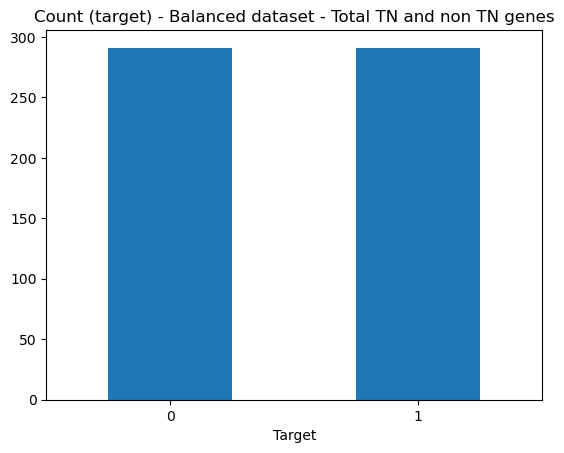

In [33]:
print("total class of 1 and 0:",occurrence_matrix_TNandNONTNrelgenes_p005_BALANCED['Target'].value_counts())# plot the count after under-sampling
occurrence_matrix_TNandNONTNrelgenes_p005_BALANCED['Target'].value_counts().plot(kind='bar', title='Count (target) - Balanced dataset - Total TN and non TN genes', rot=360)

In [34]:
occurrence_matrix_TNandNONTNrelgenes_p005_BALANCED

,TP53_Missense_Mutation_270_282,MAML3_In_Frame_Ins_503_503,PIK3CA_Missense_Mutation_1046_1047,TP53_Missense_Mutation_173_177,TP53_Missense_Mutation_236_258,GATA3_Frame_Shift_Ins_308_335,PIK3CA_Missense_Mutation_545_546,ERBB2_Missense_Mutation_767_777,GATA3_Splice_Site_308_335,TP53_Nonsense_Mutation_191_199,...,DNAJC9_Nonsense_Mutation_noClust,ACACB_Nonsense_Mutation_noClust,TACC3_Intron_noClust,CPEB1_Intron_noClust,EPG5_Splice_Site_noClust,KL_Frame_Shift_Del_noClust,PRPF38B_Nonsense_Mutation_noClust,TEX14_Splice_Site_noClust,EPAS1_Intron_noClust,Target
BR-V-044,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
TCGA-C8-A12Y,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
brca_smc_2018_BR114,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
TCGA-A2-A0EM,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
TCGA-A8-A07W,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
MBC_72,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
MBC_183,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
MBC_199,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
MBCProject_LVSjf8h7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [35]:
occurrence_matrix_TNandNONTNrelgenes_p005_BALANCED.sum(axis=0)

TP53_Missense_Mutation_270_282         43
MAML3_In_Frame_Ins_503_503              3
PIK3CA_Missense_Mutation_1046_1047     56
TP53_Missense_Mutation_173_177         24
TP53_Missense_Mutation_236_258         38
                                     ... 
KL_Frame_Shift_Del_noClust              0
PRPF38B_Nonsense_Mutation_noClust       0
TEX14_Splice_Site_noClust               0
EPAS1_Intron_noClust                    0
Target                                291
Length: 4148, dtype: int64

In [36]:
# check if there are zero rows
(occurrence_matrix_TNandNONTNrelgenes_p005_BALANCED.drop('Target', axis=1) == 0).all(axis=1).any()

False

There are not zero rows not considering the Target column: all patients have a mutation in at least one significant gene.

In [37]:
columns_with_all_zero = (occurrence_matrix_TNandNONTNrelgenes_p005_BALANCED == 0).all()
columns_with_all_zero

TP53_Missense_Mutation_270_282        False
MAML3_In_Frame_Ins_503_503            False
PIK3CA_Missense_Mutation_1046_1047    False
TP53_Missense_Mutation_173_177        False
TP53_Missense_Mutation_236_258        False
                                      ...  
KL_Frame_Shift_Del_noClust             True
PRPF38B_Nonsense_Mutation_noClust      True
TEX14_Splice_Site_noClust              True
EPAS1_Intron_noClust                   True
Target                                False
Length: 4148, dtype: bool

In [38]:
# check if there are zero columns
(occurrence_matrix_TNandNONTNrelgenes_p005_BALANCED == 0).all().sum()

1515

There are 1515 columns containing all zero values.

In [39]:
columns_to_drop = occurrence_matrix_TNandNONTNrelgenes_p005_BALANCED.columns[occurrence_matrix_TNandNONTNrelgenes_p005_BALANCED.eq(0).all()]
columns_to_drop

Index(['ABCG2_Frame_Shift_Del_22_32', 'GATA3_Frame_Shift_Del_429_434',
       'PTEN_Frame_Shift_Del_317_318', 'TBX3_In_Frame_Del_210_218',
       'GATA3_Frame_Shift_Del_308_335', 'DMXL2_Missense_Mutation_1709_1740',
       'DDX5_Missense_Mutation_134_141', 'FAM193A_Frame_Shift_Del_1170_1214',
       'MAP4K3_Missense_Mutation_395_415', 'FOXA1_Nonsense_Mutation_254_268',
       ...
       'TEX14_Frame_Shift_Del_noClust', 'DNAJC9_Nonsense_Mutation_noClust',
       'ACACB_Nonsense_Mutation_noClust', 'TACC3_Intron_noClust',
       'CPEB1_Intron_noClust', 'EPG5_Splice_Site_noClust',
       'KL_Frame_Shift_Del_noClust', 'PRPF38B_Nonsense_Mutation_noClust',
       'TEX14_Splice_Site_noClust', 'EPAS1_Intron_noClust'],
      dtype='object', length=1515)

In [40]:
# drop from the dataframe the columns containing all zeros
occurrence_matrix_TNandNONTNrelgenes_p005_BALANCED = occurrence_matrix_TNandNONTNrelgenes_p005_BALANCED.drop(columns_to_drop, axis=1)
occurrence_matrix_TNandNONTNrelgenes_p005_BALANCED

,TP53_Missense_Mutation_270_282,MAML3_In_Frame_Ins_503_503,PIK3CA_Missense_Mutation_1046_1047,TP53_Missense_Mutation_173_177,TP53_Missense_Mutation_236_258,GATA3_Frame_Shift_Ins_308_335,PIK3CA_Missense_Mutation_545_546,ERBB2_Missense_Mutation_767_777,GATA3_Splice_Site_308_335,TP53_Nonsense_Mutation_191_199,...,IP6K1_Splice_Site_noClust,SRPK1_Intron_noClust,FAM227B_Frame_Shift_Ins_noClust,SLC26A9_Splice_Region_noClust,GARNL3_Nonsense_Mutation_noClust,KAT8_Splice_Region_noClust,ACTG1_5'UTR_noClust,TRAPPC8_Intron_noClust,TRAPPC8_Splice_Site_noClust,Target
BR-V-044,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
TCGA-C8-A12Y,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
brca_smc_2018_BR114,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
TCGA-A2-A0EM,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
TCGA-A8-A07W,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
MBC_72,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
MBC_183,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
MBC_199,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
MBCProject_LVSjf8h7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [41]:
# save the BALANCED dataset
#os.chdir("C:/Users/Cristina/OneDrive/Documenti/BCG/Tesi/Occurrence matrix data")
#occurrence_matrix_TNandNONTNrelgenes_p005_BALANCED.to_csv('Occurrence_Matrix_TNandNONTNrelgenes_pval005_withLabels_BALANCED_VARIANTCLASS_afterMutClust.txt', index=True, sep='\t')

# Preparation of training and test set and range normalization

In [42]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV
import random
import shap

### Manually split the data in training set and test set 

In [43]:
occurrence_matrix_TNandNONTNrelgenes_p005_BALANCED

,TP53_Missense_Mutation_270_282,MAML3_In_Frame_Ins_503_503,PIK3CA_Missense_Mutation_1046_1047,TP53_Missense_Mutation_173_177,TP53_Missense_Mutation_236_258,GATA3_Frame_Shift_Ins_308_335,PIK3CA_Missense_Mutation_545_546,ERBB2_Missense_Mutation_767_777,GATA3_Splice_Site_308_335,TP53_Nonsense_Mutation_191_199,...,IP6K1_Splice_Site_noClust,SRPK1_Intron_noClust,FAM227B_Frame_Shift_Ins_noClust,SLC26A9_Splice_Region_noClust,GARNL3_Nonsense_Mutation_noClust,KAT8_Splice_Region_noClust,ACTG1_5'UTR_noClust,TRAPPC8_Intron_noClust,TRAPPC8_Splice_Site_noClust,Target
BR-V-044,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
TCGA-C8-A12Y,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
brca_smc_2018_BR114,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
TCGA-A2-A0EM,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
TCGA-A8-A07W,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
MBC_72,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
MBC_183,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
MBC_199,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
MBCProject_LVSjf8h7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [44]:
# remove the Target column to the occurrence matrix
X = occurrence_matrix_TNandNONTNrelgenes_p005_BALANCED.drop('Target', axis=1)
X 

,TP53_Missense_Mutation_270_282,MAML3_In_Frame_Ins_503_503,PIK3CA_Missense_Mutation_1046_1047,TP53_Missense_Mutation_173_177,TP53_Missense_Mutation_236_258,GATA3_Frame_Shift_Ins_308_335,PIK3CA_Missense_Mutation_545_546,ERBB2_Missense_Mutation_767_777,GATA3_Splice_Site_308_335,TP53_Nonsense_Mutation_191_199,...,PZP_Intron_noClust,IP6K1_Splice_Site_noClust,SRPK1_Intron_noClust,FAM227B_Frame_Shift_Ins_noClust,SLC26A9_Splice_Region_noClust,GARNL3_Nonsense_Mutation_noClust,KAT8_Splice_Region_noClust,ACTG1_5'UTR_noClust,TRAPPC8_Intron_noClust,TRAPPC8_Splice_Site_noClust
BR-V-044,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
TCGA-C8-A12Y,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
brca_smc_2018_BR114,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
TCGA-A2-A0EM,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
TCGA-A8-A07W,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
MBC_72,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
MBC_183,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
MBC_199,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
MBCProject_LVSjf8h7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [45]:
# consider the balanced occurrence matrix without the 70 pts I want to keep
occurrence_matrix_TNandNONTNrelgenes_p005_BALANCED_selection = occurrence_matrix_TNandNONTNrelgenes_p005_BALANCED[~occurrence_matrix_TNandNONTNrelgenes_p005_BALANCED.index.isin(total_pts_to_keep)]
occurrence_matrix_TNandNONTNrelgenes_p005_BALANCED_selection

,TP53_Missense_Mutation_270_282,MAML3_In_Frame_Ins_503_503,PIK3CA_Missense_Mutation_1046_1047,TP53_Missense_Mutation_173_177,TP53_Missense_Mutation_236_258,GATA3_Frame_Shift_Ins_308_335,PIK3CA_Missense_Mutation_545_546,ERBB2_Missense_Mutation_767_777,GATA3_Splice_Site_308_335,TP53_Nonsense_Mutation_191_199,...,IP6K1_Splice_Site_noClust,SRPK1_Intron_noClust,FAM227B_Frame_Shift_Ins_noClust,SLC26A9_Splice_Region_noClust,GARNL3_Nonsense_Mutation_noClust,KAT8_Splice_Region_noClust,ACTG1_5'UTR_noClust,TRAPPC8_Intron_noClust,TRAPPC8_Splice_Site_noClust,Target
BR-V-044,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
TCGA-C8-A12Y,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
brca_smc_2018_BR114,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
TCGA-A2-A0EM,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
TCGA-A8-A07W,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
MBCProject_epUYsdCE,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
MBCProject_lQtMtjFR,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
MBCProject_pMcWcrtZ,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
MBCProject_rJHBiKTl,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,1,1,0,0,0,1


In [46]:
# select the Triple Negative patients
TN_balanced_occ_matrix = occurrence_matrix_TNandNONTNrelgenes_p005_BALANCED_selection[occurrence_matrix_TNandNONTNrelgenes_p005_BALANCED_selection['Target'] == 1]
TN_balanced_occ_matrix

,TP53_Missense_Mutation_270_282,MAML3_In_Frame_Ins_503_503,PIK3CA_Missense_Mutation_1046_1047,TP53_Missense_Mutation_173_177,TP53_Missense_Mutation_236_258,GATA3_Frame_Shift_Ins_308_335,PIK3CA_Missense_Mutation_545_546,ERBB2_Missense_Mutation_767_777,GATA3_Splice_Site_308_335,TP53_Nonsense_Mutation_191_199,...,IP6K1_Splice_Site_noClust,SRPK1_Intron_noClust,FAM227B_Frame_Shift_Ins_noClust,SLC26A9_Splice_Region_noClust,GARNL3_Nonsense_Mutation_noClust,KAT8_Splice_Region_noClust,ACTG1_5'UTR_noClust,TRAPPC8_Intron_noClust,TRAPPC8_Splice_Site_noClust,Target
brca_smc_2018_BB01_004,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
brca_smc_2018_BB01_022,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
brca_smc_2018_BB01_026,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
brca_smc_2018_BB01_035,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
brca_smc_2018_BB01_040,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
MBCProject_epUYsdCE,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
MBCProject_lQtMtjFR,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
MBCProject_pMcWcrtZ,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
MBCProject_rJHBiKTl,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,1,1,0,0,0,1


In [47]:
# select the Non Triple Negative patients 
NONTN_balanced_occ_matrix = occurrence_matrix_TNandNONTNrelgenes_p005_BALANCED_selection[occurrence_matrix_TNandNONTNrelgenes_p005_BALANCED_selection['Target'] == 0]
NONTN_balanced_occ_matrix

,TP53_Missense_Mutation_270_282,MAML3_In_Frame_Ins_503_503,PIK3CA_Missense_Mutation_1046_1047,TP53_Missense_Mutation_173_177,TP53_Missense_Mutation_236_258,GATA3_Frame_Shift_Ins_308_335,PIK3CA_Missense_Mutation_545_546,ERBB2_Missense_Mutation_767_777,GATA3_Splice_Site_308_335,TP53_Nonsense_Mutation_191_199,...,IP6K1_Splice_Site_noClust,SRPK1_Intron_noClust,FAM227B_Frame_Shift_Ins_noClust,SLC26A9_Splice_Region_noClust,GARNL3_Nonsense_Mutation_noClust,KAT8_Splice_Region_noClust,ACTG1_5'UTR_noClust,TRAPPC8_Intron_noClust,TRAPPC8_Splice_Site_noClust,Target
BR-V-044,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
TCGA-C8-A12Y,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
brca_smc_2018_BR114,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
TCGA-A2-A0EM,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
TCGA-A8-A07W,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TCGA-AR-A0TT,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
TCGA-BH-A0HQ,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
TCGA-EW-A1P3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
TCGA-BH-A0AU,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [48]:
# Randomly sample 38 patients from each group
random_TN_patients_balanced = TN_balanced_occ_matrix.sample(n=38, random_state=123)
random_NONTN_patients_balanced = NONTN_balanced_occ_matrix.sample(n=38, random_state=123)
# Combine the two random samples to create the final dataset
random_tot_pts_balanced = pd.concat([random_TN_patients_balanced, random_NONTN_patients_balanced])
random_tot_pts_balanced

,TP53_Missense_Mutation_270_282,MAML3_In_Frame_Ins_503_503,PIK3CA_Missense_Mutation_1046_1047,TP53_Missense_Mutation_173_177,TP53_Missense_Mutation_236_258,GATA3_Frame_Shift_Ins_308_335,PIK3CA_Missense_Mutation_545_546,ERBB2_Missense_Mutation_767_777,GATA3_Splice_Site_308_335,TP53_Nonsense_Mutation_191_199,...,IP6K1_Splice_Site_noClust,SRPK1_Intron_noClust,FAM227B_Frame_Shift_Ins_noClust,SLC26A9_Splice_Region_noClust,GARNL3_Nonsense_Mutation_noClust,KAT8_Splice_Region_noClust,ACTG1_5'UTR_noClust,TRAPPC8_Intron_noClust,TRAPPC8_Splice_Site_noClust,Target
BR-M-045,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
TCGA-A2-A0YE,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
TCGA-AN-A0AL,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
MBC_132,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
TCGA-OL-A5S0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TCGA-BH-A18R,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
brca_smc_2018_BR331,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
X01BR015,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
BR-V-028,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [49]:
random_tot_pts_balanced.index

Index(['BR-M-045', 'TCGA-A2-A0YE', 'TCGA-AN-A0AL', 'MBC_132', 'TCGA-OL-A5S0',
       'TCGA-E2-A573', 'MBC_195', 'MBC_182', 'brca_smc_2018_BR301', 'PD4252a',
       'TCGA-E9-A244', 'TCGA-BH-A0BL', 'TCGA-A7-A0CE', 'brca_smc_2018_BR419',
       'TCGA-OL-A66I', 'brca_smc_2018_BR105', 'TCGA-E9-A243', 'MBC_142',
       'TCGA-A2-A3Y0', 'brca_smc_2018_BR097', 'MBC_205', 'TCGA-BH-A0AV',
       'MBC_85', 'BR-M-122', 'TCGA-E2-A14N', 'MBC_26', 'TCGA-A7-A0DA',
       'MBCProject_epUYsdCE', 'TCGA-B6-A0I2', 'MBC_67', 'X11BR003',
       'TCGA-A2-A04P', 'MBC_93', 'MBC_215', 'TCGA-AR-A0U0', 'TCGA-A8-A07O',
       'TCGA-A2-A1G1', 'TCGA-A2-A0T2', 'BR-M-073', 'TCGA-OL-A5RU', 'X14BR014',
       'TCGA-BH-A18N', 'TCGA-E2-A15F', 'MBCProject_27uAugT4', 'TCGA-C8-A12U',
       'MBC_178', 'TCGA-E9-A1RE', 'TCGA-BH-A18K', 'brca_smc_2018_BR170',
       'TCGA-A2-A0T5', 'MBCProject_7oIotZSe', 'TCGA-EW-A1PD', 'TCGA-A2-A0YC',
       'MBCProject_2kS5fYc1', 'TCGA-GM-A2DN', 'MBC_110', 'X06BR005',
       'BR-V-051', 'TCGA-A8

In [50]:
random_tot_pts_balanced_list = random_tot_pts_balanced.index.tolist()
random_tot_pts_balanced_df = pd.DataFrame({'Patient': random_tot_pts_balanced_list})
random_tot_pts_balanced_df

,Patient
0,BR-M-045
1,TCGA-A2-A0YE
2,TCGA-AN-A0AL
3,MBC_132
4,TCGA-OL-A5S0
...,...
71,TCGA-BH-A18R
72,brca_smc_2018_BR331
73,X01BR015
74,BR-V-028


In [51]:
os.chdir("C:/Users/Cristina/OneDrive/Documenti/BCG/Tesi")
NONTN_balanced_occ_matrix_df = pd.read_csv('NONTN_balanced_occ_matrix_df.txt', sep=',', engine='python')
NONTN_balanced_occ_matrix_df

,Patient
0,brca_smc_2018_BR114
1,MBCProject_oNI6SXtq
2,TCGA-A2-A0CP
3,brca_smc_2018_BR248
4,MBCProject_6zfRF2fl
...,...
111,TCGA-OL-A5RV
112,brca_smc_2018_BR018
113,TCGA-A2-A0YC
114,TCGA-AR-A1AW


In [52]:
pd.merge(random_tot_pts_balanced_df, NONTN_balanced_occ_matrix_df, how='inner', on=['Patient'])

,Patient
0,TCGA-A2-A0YC


In [53]:
specific_TNandNONTN_pts_balanced = occurrence_matrix_TNandNONTNrelgenes_p005_BALANCED[occurrence_matrix_TNandNONTNrelgenes_p005_BALANCED.index.isin(total_pts_to_keep)]
specific_TNandNONTN_pts_balanced

,TP53_Missense_Mutation_270_282,MAML3_In_Frame_Ins_503_503,PIK3CA_Missense_Mutation_1046_1047,TP53_Missense_Mutation_173_177,TP53_Missense_Mutation_236_258,GATA3_Frame_Shift_Ins_308_335,PIK3CA_Missense_Mutation_545_546,ERBB2_Missense_Mutation_767_777,GATA3_Splice_Site_308_335,TP53_Nonsense_Mutation_191_199,...,IP6K1_Splice_Site_noClust,SRPK1_Intron_noClust,FAM227B_Frame_Shift_Ins_noClust,SLC26A9_Splice_Region_noClust,GARNL3_Nonsense_Mutation_noClust,KAT8_Splice_Region_noClust,ACTG1_5'UTR_noClust,TRAPPC8_Intron_noClust,TRAPPC8_Splice_Site_noClust,Target
brca_smc_2018_BB01_037,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
brca_smc_2018_BB01_110,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
brca_smc_2018_BB01_119,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
brca_smc_2018_BB01_126,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
brca_smc_2018_BR145,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
MBC_72,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
MBC_183,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
MBC_199,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
MBCProject_LVSjf8h7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [54]:
total_test_pts_occ_matrix_balanced = pd.concat([random_tot_pts_balanced, specific_TNandNONTN_pts_balanced])
total_test_pts_occ_matrix_balanced

,TP53_Missense_Mutation_270_282,MAML3_In_Frame_Ins_503_503,PIK3CA_Missense_Mutation_1046_1047,TP53_Missense_Mutation_173_177,TP53_Missense_Mutation_236_258,GATA3_Frame_Shift_Ins_308_335,PIK3CA_Missense_Mutation_545_546,ERBB2_Missense_Mutation_767_777,GATA3_Splice_Site_308_335,TP53_Nonsense_Mutation_191_199,...,IP6K1_Splice_Site_noClust,SRPK1_Intron_noClust,FAM227B_Frame_Shift_Ins_noClust,SLC26A9_Splice_Region_noClust,GARNL3_Nonsense_Mutation_noClust,KAT8_Splice_Region_noClust,ACTG1_5'UTR_noClust,TRAPPC8_Intron_noClust,TRAPPC8_Splice_Site_noClust,Target
BR-M-045,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
TCGA-A2-A0YE,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
TCGA-AN-A0AL,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
MBC_132,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
TCGA-OL-A5S0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
MBC_72,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
MBC_183,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
MBC_199,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
MBCProject_LVSjf8h7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [55]:
y_test = total_test_pts_occ_matrix_balanced['Target']
y_test

BR-M-045               1
TCGA-A2-A0YE           1
TCGA-AN-A0AL           1
MBC_132                1
TCGA-OL-A5S0           1
                      ..
MBC_72                 0
MBC_183                0
MBC_199                0
MBCProject_LVSjf8h7    0
MBCProject_pktAIxFb    0
Name: Target, Length: 146, dtype: int64

In [56]:
X_test = total_test_pts_occ_matrix_balanced.drop('Target', axis=1)
X_test

,TP53_Missense_Mutation_270_282,MAML3_In_Frame_Ins_503_503,PIK3CA_Missense_Mutation_1046_1047,TP53_Missense_Mutation_173_177,TP53_Missense_Mutation_236_258,GATA3_Frame_Shift_Ins_308_335,PIK3CA_Missense_Mutation_545_546,ERBB2_Missense_Mutation_767_777,GATA3_Splice_Site_308_335,TP53_Nonsense_Mutation_191_199,...,PZP_Intron_noClust,IP6K1_Splice_Site_noClust,SRPK1_Intron_noClust,FAM227B_Frame_Shift_Ins_noClust,SLC26A9_Splice_Region_noClust,GARNL3_Nonsense_Mutation_noClust,KAT8_Splice_Region_noClust,ACTG1_5'UTR_noClust,TRAPPC8_Intron_noClust,TRAPPC8_Splice_Site_noClust
BR-M-045,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
TCGA-A2-A0YE,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
TCGA-AN-A0AL,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
MBC_132,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
TCGA-OL-A5S0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
MBC_72,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
MBC_183,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
MBC_199,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
MBCProject_LVSjf8h7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [57]:
test_pts_list = total_test_pts_occ_matrix_balanced.index.tolist()
test_pts_list

['BR-M-045',
 'TCGA-A2-A0YE',
 'TCGA-AN-A0AL',
 'MBC_132',
 'TCGA-OL-A5S0',
 'TCGA-E2-A573',
 'MBC_195',
 'MBC_182',
 'brca_smc_2018_BR301',
 'PD4252a',
 'TCGA-E9-A244',
 'TCGA-BH-A0BL',
 'TCGA-A7-A0CE',
 'brca_smc_2018_BR419',
 'TCGA-OL-A66I',
 'brca_smc_2018_BR105',
 'TCGA-E9-A243',
 'MBC_142',
 'TCGA-A2-A3Y0',
 'brca_smc_2018_BR097',
 'MBC_205',
 'TCGA-BH-A0AV',
 'MBC_85',
 'BR-M-122',
 'TCGA-E2-A14N',
 'MBC_26',
 'TCGA-A7-A0DA',
 'MBCProject_epUYsdCE',
 'TCGA-B6-A0I2',
 'MBC_67',
 'X11BR003',
 'TCGA-A2-A04P',
 'MBC_93',
 'MBC_215',
 'TCGA-AR-A0U0',
 'TCGA-A8-A07O',
 'TCGA-A2-A1G1',
 'TCGA-A2-A0T2',
 'BR-M-073',
 'TCGA-OL-A5RU',
 'X14BR014',
 'TCGA-BH-A18N',
 'TCGA-E2-A15F',
 'MBCProject_27uAugT4',
 'TCGA-C8-A12U',
 'MBC_178',
 'TCGA-E9-A1RE',
 'TCGA-BH-A18K',
 'brca_smc_2018_BR170',
 'TCGA-A2-A0T5',
 'MBCProject_7oIotZSe',
 'TCGA-EW-A1PD',
 'TCGA-A2-A0YC',
 'MBCProject_2kS5fYc1',
 'TCGA-GM-A2DN',
 'MBC_110',
 'X06BR005',
 'BR-V-051',
 'TCGA-A8-A09M',
 'TCGA-BH-A18F',
 'TCGA-A8-A08P

In [58]:
len(test_pts_list)

146

In [59]:
total_training_pts_occ_matrix_balanced = occurrence_matrix_TNandNONTNrelgenes_p005_BALANCED[~occurrence_matrix_TNandNONTNrelgenes_p005_BALANCED.index.isin(test_pts_list)]
total_training_pts_occ_matrix_balanced

,TP53_Missense_Mutation_270_282,MAML3_In_Frame_Ins_503_503,PIK3CA_Missense_Mutation_1046_1047,TP53_Missense_Mutation_173_177,TP53_Missense_Mutation_236_258,GATA3_Frame_Shift_Ins_308_335,PIK3CA_Missense_Mutation_545_546,ERBB2_Missense_Mutation_767_777,GATA3_Splice_Site_308_335,TP53_Nonsense_Mutation_191_199,...,IP6K1_Splice_Site_noClust,SRPK1_Intron_noClust,FAM227B_Frame_Shift_Ins_noClust,SLC26A9_Splice_Region_noClust,GARNL3_Nonsense_Mutation_noClust,KAT8_Splice_Region_noClust,ACTG1_5'UTR_noClust,TRAPPC8_Intron_noClust,TRAPPC8_Splice_Site_noClust,Target
BR-V-044,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
TCGA-C8-A12Y,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
brca_smc_2018_BR114,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
TCGA-A2-A0EM,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
TCGA-A8-A07W,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
MBCProject_QJFdf8hQ,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
MBCProject_lQtMtjFR,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
MBCProject_pMcWcrtZ,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
MBCProject_rJHBiKTl,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,1,1,0,0,0,1


In [60]:
y_train = total_training_pts_occ_matrix_balanced['Target']
y_train

BR-V-044               0
TCGA-C8-A12Y           0
brca_smc_2018_BR114    0
TCGA-A2-A0EM           0
TCGA-A8-A07W           0
                      ..
MBCProject_QJFdf8hQ    1
MBCProject_lQtMtjFR    1
MBCProject_pMcWcrtZ    1
MBCProject_rJHBiKTl    1
MBCProject_wzCxuoio    1
Name: Target, Length: 436, dtype: int64

In [61]:
X_train = total_training_pts_occ_matrix_balanced.drop('Target', axis=1)
X_train

,TP53_Missense_Mutation_270_282,MAML3_In_Frame_Ins_503_503,PIK3CA_Missense_Mutation_1046_1047,TP53_Missense_Mutation_173_177,TP53_Missense_Mutation_236_258,GATA3_Frame_Shift_Ins_308_335,PIK3CA_Missense_Mutation_545_546,ERBB2_Missense_Mutation_767_777,GATA3_Splice_Site_308_335,TP53_Nonsense_Mutation_191_199,...,PZP_Intron_noClust,IP6K1_Splice_Site_noClust,SRPK1_Intron_noClust,FAM227B_Frame_Shift_Ins_noClust,SLC26A9_Splice_Region_noClust,GARNL3_Nonsense_Mutation_noClust,KAT8_Splice_Region_noClust,ACTG1_5'UTR_noClust,TRAPPC8_Intron_noClust,TRAPPC8_Splice_Site_noClust
BR-V-044,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
TCGA-C8-A12Y,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
brca_smc_2018_BR114,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
TCGA-A2-A0EM,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
TCGA-A8-A07W,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
MBCProject_QJFdf8hQ,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
MBCProject_lQtMtjFR,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
MBCProject_pMcWcrtZ,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
MBCProject_rJHBiKTl,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,1,1,0,0,0


In [62]:
training_pts_list = total_training_pts_occ_matrix_balanced.index.tolist()
training_pts_list

['BR-V-044',
 'TCGA-C8-A12Y',
 'brca_smc_2018_BR114',
 'TCGA-A2-A0EM',
 'TCGA-A8-A07W',
 'TCGA-AO-A0JD',
 'BR-V-049',
 'TCGA-BH-A204',
 'TCGA-E9-A1R4',
 'TCGA-B6-A0WS',
 'BR-M-034',
 'TCGA-AO-A03P',
 'TCGA-AR-A24Z',
 'TCGA-E2-A15C',
 'TCGA-B6-A0WZ',
 'TCGA-GM-A2DC',
 'TCGA-BH-A1FH',
 'MBCProject_gdIlF4hG',
 'brca_smc_2018_BB01_081',
 'TCGA-E2-A154',
 'TCGA-S3-AA12',
 'X11BR050',
 'BR-M-047',
 'MBC_200',
 'PD3858a',
 'TCGA-EW-A6SD',
 'TCGA-BH-A0W4',
 'TCGA-C8-A1HF',
 'TCGA-A2-A4S3',
 'MBC_7',
 'X11BR022',
 'MBC_165',
 'PD4076a',
 'PD3986a',
 'BR-V-022',
 'MBCProject_MvhNc7Cd',
 'TCGA-AR-A255',
 'X11BR018',
 'TCGA-B6-A0RN',
 'TCGA-AR-A1AP',
 'MBC_203',
 'X11BR028',
 'PD4094a',
 'TCGA-S3-AA14',
 'brca_smc_2018_BB01_108',
 'TCGA-3C-AALK',
 'TCGA-A8-A08B',
 'MBC_136',
 'TCGA-BH-A203',
 'MBCProject_3vhkhAcY',
 'X11BR030',
 'MBC_57',
 'PD4938a',
 'brca_smc_2018_BB01_010',
 'brca_smc_2018_BR248',
 'TCGA-BH-A0DQ',
 'X22BR005',
 'MBC_202',
 'TCGA-S3-A6ZF',
 'MBC_40',
 'MBC_34',
 'MBC_46',
 'brca

In [63]:
# Create a new DataFrame with the patient indices
training_pts_df = pd.DataFrame({'Patient': training_pts_list})
training_pts_df

,Patient
0,BR-V-044
1,TCGA-C8-A12Y
2,brca_smc_2018_BR114
3,TCGA-A2-A0EM
4,TCGA-A8-A07W
...,...
431,MBCProject_QJFdf8hQ
432,MBCProject_lQtMtjFR
433,MBCProject_pMcWcrtZ
434,MBCProject_rJHBiKTl


In [64]:
os.chdir("C:/Users/Cristina/OneDrive/Documenti/BCG/Tesi/Training_patients")
# save the training patients 
training_pts_df.to_csv('Training_TNandNONTNpts_hugoVariant_p005.txt', index=False, sep='\t')

In [65]:
X_train.columns[(X_train == 0).all(axis=0)]

Index(['GATA3_Frame_Shift_Del_406_408', 'DNAH14_Silent_143_288',
       'FOXA1_Missense_Mutation_254_268', 'DNAH14_Intron_143_288',
       'TBX3_Frame_Shift_Del_210_218', 'ITPKB_Missense_Mutation_noClust',
       'DNAH7_Splice_Site_noClust', 'TMEM261_Missense_Mutation_noClust',
       'NFE2L3_Frame_Shift_Del_noClust', 'WTAP_Missense_Mutation_noClust',
       ...
       'TMEM214_Splice_Site_noClust', 'CCNT2_Splice_Site_noClust',
       'WWP1_3'Flank_noClust', 'PFKM_Intron_noClust', 'PEX11G_3'Flank_noClust',
       'GOLT1A_Missense_Mutation_noClust', 'IP6K3_Splice_Region_noClust',
       'IP6K1_Splice_Site_noClust', 'SRPK1_Intron_noClust',
       'FAM227B_Frame_Shift_Ins_noClust'],
      dtype='object', length=444)

In [66]:
len(X_train.columns[(X_train == 0).all(axis=0)])

444

There are 444 columns in the training dataset with just 0 values. 

In [67]:
X_test

,TP53_Missense_Mutation_270_282,MAML3_In_Frame_Ins_503_503,PIK3CA_Missense_Mutation_1046_1047,TP53_Missense_Mutation_173_177,TP53_Missense_Mutation_236_258,GATA3_Frame_Shift_Ins_308_335,PIK3CA_Missense_Mutation_545_546,ERBB2_Missense_Mutation_767_777,GATA3_Splice_Site_308_335,TP53_Nonsense_Mutation_191_199,...,PZP_Intron_noClust,IP6K1_Splice_Site_noClust,SRPK1_Intron_noClust,FAM227B_Frame_Shift_Ins_noClust,SLC26A9_Splice_Region_noClust,GARNL3_Nonsense_Mutation_noClust,KAT8_Splice_Region_noClust,ACTG1_5'UTR_noClust,TRAPPC8_Intron_noClust,TRAPPC8_Splice_Site_noClust
BR-M-045,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
TCGA-A2-A0YE,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
TCGA-AN-A0AL,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
MBC_132,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
TCGA-OL-A5S0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
MBC_72,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
MBC_183,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
MBC_199,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
MBCProject_LVSjf8h7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [68]:
X_test.columns[(X_test == 0).all(axis=0)]

Index(['ERBB2_Missense_Mutation_767_777', 'DNAH14_Missense_Mutation_143_288',
       'OR4D10_Missense_Mutation_175_183', 'GATA3_Frame_Shift_Ins_429_434',
       'CTCF_Missense_Mutation_283_288', 'NUP93_Missense_Mutation_14_15',
       'TP53_Frame_Shift_Del_191_199', 'TP53_In_Frame_Del_191_199',
       'TP53_Silent_270_282', 'ZNF208_Missense_Mutation_548_549',
       ...
       'CYTIP_Splice_Site_noClust', 'KIAA0355_Splice_Region_noClust',
       'SETDB1_3'UTR_noClust', 'PZP_Intron_noClust',
       'SLC26A9_Splice_Region_noClust', 'GARNL3_Nonsense_Mutation_noClust',
       'KAT8_Splice_Region_noClust', 'ACTG1_5'UTR_noClust',
       'TRAPPC8_Intron_noClust', 'TRAPPC8_Splice_Site_noClust'],
      dtype='object', length=1548)

There are 1548 columns in the test dataset with just zero values.

In [69]:
y_train.value_counts()

Target
0    218
1    218
Name: count, dtype: int64

In [70]:
y_test.value_counts()

Target
1    73
0    73
Name: count, dtype: int64

In [71]:
# range-normalization on the training set 
def range_norm_training(x):
    return (x - x.min()) / (x.max() - x.min())

In [72]:
# apply this normalization column-wise to the training 
normalized_X_train = X_train.apply(range_norm_training, axis=0)
normalized_X_train

,TP53_Missense_Mutation_270_282,MAML3_In_Frame_Ins_503_503,PIK3CA_Missense_Mutation_1046_1047,TP53_Missense_Mutation_173_177,TP53_Missense_Mutation_236_258,GATA3_Frame_Shift_Ins_308_335,PIK3CA_Missense_Mutation_545_546,ERBB2_Missense_Mutation_767_777,GATA3_Splice_Site_308_335,TP53_Nonsense_Mutation_191_199,...,PZP_Intron_noClust,IP6K1_Splice_Site_noClust,SRPK1_Intron_noClust,FAM227B_Frame_Shift_Ins_noClust,SLC26A9_Splice_Region_noClust,GARNL3_Nonsense_Mutation_noClust,KAT8_Splice_Region_noClust,ACTG1_5'UTR_noClust,TRAPPC8_Intron_noClust,TRAPPC8_Splice_Site_noClust
BR-V-044,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0
TCGA-C8-A12Y,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0
brca_smc_2018_BR114,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0
TCGA-A2-A0EM,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0
TCGA-A8-A07W,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
MBCProject_QJFdf8hQ,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0
MBCProject_lQtMtjFR,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0
MBCProject_pMcWcrtZ,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0
MBCProject_rJHBiKTl,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,NaN,NaN,NaN,1.0,1.0,1.0,0.0,0.0,0.0


In [73]:
# check the columns containing just Nan Values 
normalized_X_train.isna().all(axis=0).sum()

444

444 columns contain NaN values, that are the columns with all zero values in the training set.

In [74]:
np.isinf(normalized_X_train).any().any()

False

In [75]:
# replace the NaN values with zero 
normalized_X_train = normalized_X_train.fillna(0)
normalized_X_train

,TP53_Missense_Mutation_270_282,MAML3_In_Frame_Ins_503_503,PIK3CA_Missense_Mutation_1046_1047,TP53_Missense_Mutation_173_177,TP53_Missense_Mutation_236_258,GATA3_Frame_Shift_Ins_308_335,PIK3CA_Missense_Mutation_545_546,ERBB2_Missense_Mutation_767_777,GATA3_Splice_Site_308_335,TP53_Nonsense_Mutation_191_199,...,PZP_Intron_noClust,IP6K1_Splice_Site_noClust,SRPK1_Intron_noClust,FAM227B_Frame_Shift_Ins_noClust,SLC26A9_Splice_Region_noClust,GARNL3_Nonsense_Mutation_noClust,KAT8_Splice_Region_noClust,ACTG1_5'UTR_noClust,TRAPPC8_Intron_noClust,TRAPPC8_Splice_Site_noClust
BR-V-044,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
TCGA-C8-A12Y,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
brca_smc_2018_BR114,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
TCGA-A2-A0EM,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
TCGA-A8-A07W,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
MBCProject_QJFdf8hQ,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
MBCProject_lQtMtjFR,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
MBCProject_pMcWcrtZ,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
MBCProject_rJHBiKTl,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0


In [76]:
# Extract the row indices as a list
training_patient_indices = normalized_X_train.index.tolist()
# Create a new DataFrame with the patient indices
training_patient_df = pd.DataFrame({'Patient': training_patient_indices})
training_patient_df

,Patient
0,BR-V-044
1,TCGA-C8-A12Y
2,brca_smc_2018_BR114
3,TCGA-A2-A0EM
4,TCGA-A8-A07W
...,...
431,MBCProject_QJFdf8hQ
432,MBCProject_lQtMtjFR
433,MBCProject_pMcWcrtZ
434,MBCProject_rJHBiKTl


In [77]:
normalized_X_train.isna().any().any()

False

In [78]:
normalized_X_train.sum(axis=0)

TP53_Missense_Mutation_270_282        32.0
MAML3_In_Frame_Ins_503_503             2.0
PIK3CA_Missense_Mutation_1046_1047    31.0
TP53_Missense_Mutation_173_177        12.0
TP53_Missense_Mutation_236_258        12.5
                                      ... 
GARNL3_Nonsense_Mutation_noClust       1.0
KAT8_Splice_Region_noClust             1.0
ACTG1_5'UTR_noClust                    1.0
TRAPPC8_Intron_noClust                 1.0
TRAPPC8_Splice_Site_noClust            1.0
Length: 2632, dtype: float64

In [79]:
normalized_X_train.sum(axis=0).sum()

4175.75

In [80]:
# define a function to perform range normalization on the test set based on the values of the training set 
def range_norm_test(train_set, test_set):
    #compute the minimum and the maximum values for each column in the training 
    min_value = train_set.min(axis=0)
    max_value = train_set.max(axis=0)
    # Apply range normalization to the test set based on the min and the max of the training set 
    normalized_test_set = (test_set - min_value) / (max_value - min_value)
    
    return normalized_test_set

# NOTE: it is not necessary to check if the minimum of the test is > than the minimum of the training, since the minimum values in each column both for the test and for the training are zeros

In [81]:
normalized_X_test = range_norm_test(X_train, X_test)
normalized_X_test

,TP53_Missense_Mutation_270_282,MAML3_In_Frame_Ins_503_503,PIK3CA_Missense_Mutation_1046_1047,TP53_Missense_Mutation_173_177,TP53_Missense_Mutation_236_258,GATA3_Frame_Shift_Ins_308_335,PIK3CA_Missense_Mutation_545_546,ERBB2_Missense_Mutation_767_777,GATA3_Splice_Site_308_335,TP53_Nonsense_Mutation_191_199,...,PZP_Intron_noClust,IP6K1_Splice_Site_noClust,SRPK1_Intron_noClust,FAM227B_Frame_Shift_Ins_noClust,SLC26A9_Splice_Region_noClust,GARNL3_Nonsense_Mutation_noClust,KAT8_Splice_Region_noClust,ACTG1_5'UTR_noClust,TRAPPC8_Intron_noClust,TRAPPC8_Splice_Site_noClust
BR-M-045,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0
TCGA-A2-A0YE,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0
TCGA-AN-A0AL,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0
MBC_132,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0
TCGA-OL-A5S0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
MBC_72,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0
MBC_183,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0
MBC_199,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0
MBCProject_LVSjf8h7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0


In [82]:
np.isinf(normalized_X_test).any().any()

True

In [83]:
# check the columns containing just Nan Values 
normalized_X_test.isna().all(axis=0).sum()

0

In [84]:
# check how many columns contain all infinite values 
np.isinf(normalized_X_test).any().sum()

444

444 as the number of zero columns in the training set 

In [85]:
# replace the Infinite values with zero 
normalized_X_test = normalized_X_test.replace([np.inf, -np.inf], 0)
normalized_X_test

,TP53_Missense_Mutation_270_282,MAML3_In_Frame_Ins_503_503,PIK3CA_Missense_Mutation_1046_1047,TP53_Missense_Mutation_173_177,TP53_Missense_Mutation_236_258,GATA3_Frame_Shift_Ins_308_335,PIK3CA_Missense_Mutation_545_546,ERBB2_Missense_Mutation_767_777,GATA3_Splice_Site_308_335,TP53_Nonsense_Mutation_191_199,...,PZP_Intron_noClust,IP6K1_Splice_Site_noClust,SRPK1_Intron_noClust,FAM227B_Frame_Shift_Ins_noClust,SLC26A9_Splice_Region_noClust,GARNL3_Nonsense_Mutation_noClust,KAT8_Splice_Region_noClust,ACTG1_5'UTR_noClust,TRAPPC8_Intron_noClust,TRAPPC8_Splice_Site_noClust
BR-M-045,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0
TCGA-A2-A0YE,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0
TCGA-AN-A0AL,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0
MBC_132,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0
TCGA-OL-A5S0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
MBC_72,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0
MBC_183,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0
MBC_199,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0
MBCProject_LVSjf8h7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0


In [86]:
# replace the NaN values with zero 
normalized_X_test = normalized_X_test.fillna(0)
normalized_X_test

,TP53_Missense_Mutation_270_282,MAML3_In_Frame_Ins_503_503,PIK3CA_Missense_Mutation_1046_1047,TP53_Missense_Mutation_173_177,TP53_Missense_Mutation_236_258,GATA3_Frame_Shift_Ins_308_335,PIK3CA_Missense_Mutation_545_546,ERBB2_Missense_Mutation_767_777,GATA3_Splice_Site_308_335,TP53_Nonsense_Mutation_191_199,...,PZP_Intron_noClust,IP6K1_Splice_Site_noClust,SRPK1_Intron_noClust,FAM227B_Frame_Shift_Ins_noClust,SLC26A9_Splice_Region_noClust,GARNL3_Nonsense_Mutation_noClust,KAT8_Splice_Region_noClust,ACTG1_5'UTR_noClust,TRAPPC8_Intron_noClust,TRAPPC8_Splice_Site_noClust
BR-M-045,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
TCGA-A2-A0YE,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
TCGA-AN-A0AL,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
MBC_132,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
TCGA-OL-A5S0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
MBC_72,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
MBC_183,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
MBC_199,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
MBCProject_LVSjf8h7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [87]:
np.isinf(normalized_X_test).any().sum()

0

In [88]:
normalized_X_test.isnull().all(axis=0).sum()

0

### Select the test patients 


In [89]:
# Extract the row indices as a list
test_patient_indices = normalized_X_test.index.tolist()
test_patient_indices

['BR-M-045',
 'TCGA-A2-A0YE',
 'TCGA-AN-A0AL',
 'MBC_132',
 'TCGA-OL-A5S0',
 'TCGA-E2-A573',
 'MBC_195',
 'MBC_182',
 'brca_smc_2018_BR301',
 'PD4252a',
 'TCGA-E9-A244',
 'TCGA-BH-A0BL',
 'TCGA-A7-A0CE',
 'brca_smc_2018_BR419',
 'TCGA-OL-A66I',
 'brca_smc_2018_BR105',
 'TCGA-E9-A243',
 'MBC_142',
 'TCGA-A2-A3Y0',
 'brca_smc_2018_BR097',
 'MBC_205',
 'TCGA-BH-A0AV',
 'MBC_85',
 'BR-M-122',
 'TCGA-E2-A14N',
 'MBC_26',
 'TCGA-A7-A0DA',
 'MBCProject_epUYsdCE',
 'TCGA-B6-A0I2',
 'MBC_67',
 'X11BR003',
 'TCGA-A2-A04P',
 'MBC_93',
 'MBC_215',
 'TCGA-AR-A0U0',
 'TCGA-A8-A07O',
 'TCGA-A2-A1G1',
 'TCGA-A2-A0T2',
 'BR-M-073',
 'TCGA-OL-A5RU',
 'X14BR014',
 'TCGA-BH-A18N',
 'TCGA-E2-A15F',
 'MBCProject_27uAugT4',
 'TCGA-C8-A12U',
 'MBC_178',
 'TCGA-E9-A1RE',
 'TCGA-BH-A18K',
 'brca_smc_2018_BR170',
 'TCGA-A2-A0T5',
 'MBCProject_7oIotZSe',
 'TCGA-EW-A1PD',
 'TCGA-A2-A0YC',
 'MBCProject_2kS5fYc1',
 'TCGA-GM-A2DN',
 'MBC_110',
 'X06BR005',
 'BR-V-051',
 'TCGA-A8-A09M',
 'TCGA-BH-A18F',
 'TCGA-A8-A08P

In [90]:
# Create a new DataFrame with the patient indices
test_patient_df = pd.DataFrame({'Patient': test_patient_indices})
test_patient_df

,Patient
0,BR-M-045
1,TCGA-A2-A0YE
2,TCGA-AN-A0AL
3,MBC_132
4,TCGA-OL-A5S0
...,...
141,MBC_72
142,MBC_183
143,MBC_199
144,MBCProject_LVSjf8h7


In [91]:
os.chdir("C:/Users/Cristina/OneDrive/Documenti/BCG/Tesi/Test_patients")
test_patient_df.to_csv('Test_TNandNONTNpts_hugoVariant_p005.txt', index=False, sep='\t')

### Study the intersection between the test patients of only clusters and these test patients

In [92]:
onlyclusters_TNandNONTN_test_pts_p005

,Patient
0,TCGA-B6-A401
1,TCGA-B6-A0X5
2,TCGA-A2-A0D0
3,TCGA-A2-A0CL
4,TCGA-D8-A142
...,...
65,brca_smc_2018_BR371
66,brca_smc_2018_BB01_017
67,TCGA-A7-A0DB
68,brca_smc_2018_BB01_126


### Study the overlapping between the test patients of 'only cluster' encoding and the test patients of the current encoding

In [93]:
pd.merge(test_patient_df, onlyclusters_TNandNONTN_test_pts_p005, how='inner', on=['Patient'])

,Patient
0,brca_smc_2018_BB01_037
1,brca_smc_2018_BB01_110
2,brca_smc_2018_BB01_119
3,brca_smc_2018_BB01_126
4,brca_smc_2018_BR145
...,...
65,MBC_72
66,MBC_183
67,MBC_199
68,MBCProject_LVSjf8h7


In [94]:
pd.merge(training_patient_df, onlyclusters_TNandNONTN_test_pts_p005, how='inner', on=['Patient'])

,Patient


In [95]:
features = pd.DataFrame(normalized_X_test.columns, columns=['Features'])
features

,Features
0,TP53_Missense_Mutation_270_282
1,MAML3_In_Frame_Ins_503_503
2,PIK3CA_Missense_Mutation_1046_1047
3,TP53_Missense_Mutation_173_177
4,TP53_Missense_Mutation_236_258
...,...
2627,GARNL3_Nonsense_Mutation_noClust
2628,KAT8_Splice_Region_noClust
2629,ACTG1_5'UTR_noClust
2630,TRAPPC8_Intron_noClust


In [96]:
features['Hugo_Symbol'] = features['Features'].str.split('_').str[0]
features

,Features,Hugo_Symbol
0,TP53_Missense_Mutation_270_282,TP53
1,MAML3_In_Frame_Ins_503_503,MAML3
2,PIK3CA_Missense_Mutation_1046_1047,PIK3CA
3,TP53_Missense_Mutation_173_177,TP53
4,TP53_Missense_Mutation_236_258,TP53
...,...,...
2627,GARNL3_Nonsense_Mutation_noClust,GARNL3
2628,KAT8_Splice_Region_noClust,KAT8
2629,ACTG1_5'UTR_noClust,ACTG1
2630,TRAPPC8_Intron_noClust,TRAPPC8


In [97]:
features_hugo = features[['Hugo_Symbol']]
features_hugo

,Hugo_Symbol
0,TP53
1,MAML3
2,PIK3CA
3,TP53
4,TP53
...,...
2627,GARNL3
2628,KAT8
2629,ACTG1
2630,TRAPPC8


In [98]:
# consider just unique genes - drop duplicates 
features_hugo_nodup = features_hugo.drop_duplicates()
features_hugo_nodup

,Hugo_Symbol
0,TP53
1,MAML3
2,PIK3CA
5,GATA3
7,ERBB2
...,...
2538,PSTPIP2
2584,DIMT1
2596,CCNT2
2615,CYCS


In [99]:
features_hugo_nodup.shape

(979, 1)

# Lasso Logistic Regression

## Grid search to find the optimal C parameter for Lasso regression

GridSearchCV(cv=5,
             estimator=LogisticRegression(max_iter=10000, penalty='l1',
                                          solver='liblinear'),
             param_grid={'C': array([1.00000000e-02, 2.57384615e+00, 5.13769231e+00, 7.70153846e+00,
       1.02653846e+01, 1.28292308e+01, 1.53930769e+01, 1.79569231e+01,
       2.05207692e+01, 2.30846154e+01, 2.56484615e+01, 2.82123077e+01,
       3.07761538e+01, 3.33400000e+01, 3.59038462e+01, 3.84676...
       4.10315385e+01, 4.35953846e+01, 4.61592308e+01, 4.87230769e+01,
       5.12869231e+01, 5.38507692e+01, 5.64146154e+01, 5.89784615e+01,
       6.15423077e+01, 6.41061538e+01, 6.66700000e+01, 6.92338462e+01,
       7.17976923e+01, 7.43615385e+01, 7.69253846e+01, 7.94892308e+01,
       8.20530769e+01, 8.46169231e+01, 8.71807692e+01, 8.97446154e+01,
       9.23084615e+01, 9.48723077e+01, 9.74361538e+01, 1.00000000e+02])})

Best lambda (alpha) for Lasso logistic regression:  0.38852361028093246
Best cross-validation score:  0.6768808777429467


Text(0.5, 0, 'C')

Text(0, 0.5, 'CV-Accuracy')

Text(0.5, 1.0, 'Grid Search Results')

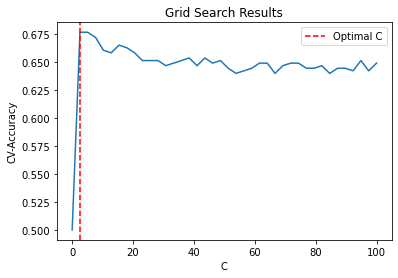

In [85]:
# The code performs a grid search with cross-validation (5-fold) to find the optimal value of the 'C' parameter in Lasso logistic regression. 
# It tries different values of 'C' specified in param_grid and evaluates the model's performance using 5-fold cross-validation. The result is stored in the grid_search object, which can be accessed to retrieve the best hyperparameters and evaluate the model's performance.

param_grid = {'C': np.linspace(0.01, 100, 40)}
# Create a logistic regression model with Lasso regularization
lasso_model = LogisticRegression(penalty='l1', solver='liblinear', max_iter=10000) # if I add max_iter=int(1e6), it blocks

# Perform grid search with cross-validation (cv=5)
grid_search = GridSearchCV(lasso_model, param_grid, cv=5)
grid_search.fit(normalized_X_train, y_train)

# Print the best lambda (alpha) value
print("Best lambda (alpha) for Lasso logistic regression: ", 1 / grid_search.best_estimator_.C)

# Print the best cross-validation score
print("Best cross-validation score: ", grid_search.best_score_)

C_values = np.linspace(0.01, 100, 40)
accuracy_scores = grid_search.cv_results_['mean_test_score']

max_accuracy = np.max(accuracy_scores)
best_C = C_values[np.argmax(accuracy_scores)]


plt.plot(C_values, accuracy_scores)
plt.axvline(x=best_C, color='r', linestyle='--', label='Optimal C')
plt.xlabel('C')
plt.ylabel('CV-Accuracy')
plt.title('Grid Search Results')
plt.legend()
plt.show()

Best lambda (alpha) for Lasso logistic regression: 0.38852361028093246 (C=2.57).

### Compute the classification metrics on the cross-validation results 

In [86]:
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score

# After fitting the grid search, calculate metrics using cross_val_predict
best_lasso_model = grid_search.best_estimator_  # Get the best Lasso model with the optimal C

# Use cross_val_predict to get predictions for each fold in cross-validation
y_pred = cross_val_predict(best_lasso_model, normalized_X_train, y_train, cv=5)

# Calculate accuracy for each fold
accuracy_scores = cross_val_score(best_lasso_model, normalized_X_train, y_train, cv=5, scoring='accuracy')
# Calculate precision, recall and F1 for each fold
# By default, precision, recall and F1 refer to the positive class (1)
precision_scores_1 = cross_val_score(best_lasso_model, normalized_X_train, y_train, cv=5, scoring='precision')
recall_scores_1 = cross_val_score(best_lasso_model, normalized_X_train, y_train, cv=5, scoring='recall')
f1_scores_1 = cross_val_score(best_lasso_model, normalized_X_train, y_train, cv=5, scoring='f1')

# Calculate the mean cross-validation precision and recall
mean_accuracy = np.mean(accuracy_scores)
std_accuracy = np.std(accuracy_scores)
mean_precision_1 = np.mean(precision_scores_1)
std_precision_1 = np.std(precision_scores_1)
mean_recall_1 = np.mean(recall_scores_1)
std_recall_1 = np.std(recall_scores_1)
mean_f1_1 = np.mean(f1_scores_1)
std_f1_1 = np.std(f1_scores_1)


# Print the mean cross-validation precision and recall
print("Mean Cross-Validation Accuracy:", mean_accuracy)
print("Standard Deviation of Accuracy:", std_accuracy)
print("Mean Cross-Validation Precision - 1:", mean_precision_1)
print("Standard Deviation of Precision - 1:", std_precision_1)
print("Mean Cross-Validation Recall - 1:", mean_recall_1)
print("Standard Deviation of Recall - 1:", std_recall_1)
print("Mean Cross-Validation F1-score - 1:", mean_f1_1)
print("Standard Deviation of F1-score - 1:", std_f1_1)

Liblinear failed to converge, increase the number of iterations.


Mean Cross-Validation Accuracy: 0.6768808777429467
Standard Deviation of Accuracy: 0.08561241781076259
Mean Cross-Validation Precision - 1: 0.6900300370010832
Standard Deviation of Precision - 1: 0.08011927268848465
Mean Cross-Validation Recall - 1: 0.6341437632135306
Standard Deviation of Recall - 1: 0.1483069728165864
Mean Cross-Validation F1-score - 1: 0.6550737198877284
Standard Deviation of F1-score - 1: 0.11559188926945482


Liblinear failed to converge, increase the number of iterations.


In [87]:
precision_scores_1 

array([0.5862069 , 0.775     , 0.79069767, 0.66666667, 0.63157895])

#### Compute the mean and the standard deviation cross-validation precision, recall and F1-score for the negative class 0

In [88]:
from sklearn.metrics import make_scorer
# 1) PRECISION
# 'make_scorer' defines a custom scoring function for precision of class 0
# 'precision_score' is the scoring function that you want to use as a base
# 'pos_label=0' specifies that you want to calculate precision for class 0
precision_scorer_class0 = make_scorer(precision_score, pos_label=0)

# Calculate precision for class 0 (negative class)
precision_scores_0 = cross_val_score(best_lasso_model, normalized_X_train, y_train, cv=5, scoring=precision_scorer_class0)

# 2) RECALL 
# Define a custom scorer for recall of class 0
recall_scorer_class0 = make_scorer(recall_score, pos_label=0)

# Calculate recall for class 0 (negative class)
recall_scores_0 = cross_val_score(best_lasso_model, normalized_X_train, y_train, cv=5, scoring=recall_scorer_class0)

# 3) F1-SCORE
# Define a custom scorer for F1-score of class 0
f1_scorer_class0 = make_scorer(f1_score, pos_label=0)

# Calculate F1-score for class 0 (negative class)
f1_scores_0 = cross_val_score(best_lasso_model, normalized_X_train, y_train, cv=5, scoring=f1_scorer_class0)

# compute the mean and the standard deviation
mean_precision_0 = np.mean(precision_scores_0)
std_precision_0 = np.std(precision_scores_0)
mean_recall_0 = np.mean(recall_scores_0)
std_recall_0 = np.std(recall_scores_0)
mean_f1_0 = np.mean(f1_scores_0)
std_f1_0 = np.std(f1_scores_0)

print("Mean Cross-Validation Precision - 0:", mean_precision_0)
print("Standard Deviation of Precision - 0:", std_precision_0)
print("Mean Cross-Validation Recall - 0:", mean_recall_0)
print("Standard Deviation of Recall - 0:", std_recall_0)
print("Mean Cross-Validation F1-score: - 0", mean_f1_0)
print("Standard Deviation of F1-score: - 0", std_f1_0)

Liblinear failed to converge, increase the number of iterations.


Mean Cross-Validation Precision - 0: 0.6723791667679874
Standard Deviation of Precision - 0: 0.09274984263698224
Mean Cross-Validation Recall - 0: 0.7195560253699788
Standard Deviation of Recall - 0: 0.06178065918711795
Mean Cross-Validation F1-score: - 0 0.6922341111817177
Standard Deviation of F1-score: - 0 0.06912932955042181


In [89]:
precision_scores_0

array([0.54237288, 0.74468085, 0.79069767, 0.69230769, 0.59183673])

In [88]:
# define a function that performs a Logistic Regression using Lasso (default C=1) as Regularization type
def Lasso (X_train, X_test, y_train, y_test):
   
    

# Definizione dell'istanza del modello.
    clf = LogisticRegression(penalty="l1", solver="liblinear", tol=1e-6, max_iter=10000, warm_start=True, intercept_scaling=10000.0, C=2.57)   
# setting warm_start=False to start training from scratch each time, eliminating the influence of previous solutions.

# Addestramento del modello sui dati di training
    clf.fit(X_train, y_train)

# Predizione sui dati di test
    y_pred = clf.predict(X_test)

# Valutazione del modello
    print(classification_report(y_test, y_pred))

    coef_indexes = clf.coef_[0].nonzero()[0]

    # Numero delle feature con coefficiente diverso da zero
    n_features = len(coef_indexes)

    # Nomi delle feature con coefficiente diverso da zero
    feature_names = X.columns[coef_indexes]


    print(f"Numero di feature con coefficiente diverso da zero: {n_features}")
    print(f"Nomi delle feature con coefficiente diverso da zero: {feature_names}")

    explainer = shap.Explainer(clf, X_train)

# Calcola i valori Shapley per le feature del modello addestrato
    shap_values = explainer(X_test)

# Visualizza un grafico delle feature più importanti
    shap.plots.bar(shap_values.mean(0))
   # shap.plots.bar(shap_values)
    #shap.plots.force(shap_values)


    return (y_pred, feature_names)

Liblinear failed to converge, increase the number of iterations.


              precision    recall  f1-score   support

           0       0.74      0.82      0.78        73
           1       0.80      0.71      0.75        73

    accuracy                           0.77       146
   macro avg       0.77      0.77      0.77       146
weighted avg       0.77      0.77      0.77       146

Numero di feature con coefficiente diverso da zero: 201
Nomi delle feature con coefficiente diverso da zero: Index(['TP53_Missense_Mutation_270_282', 'MAML3_In_Frame_Ins_503_503',
       'PIK3CA_Missense_Mutation_1046_1047', 'TP53_Missense_Mutation_173_177',
       'TP53_Missense_Mutation_236_258', 'GATA3_Frame_Shift_Ins_308_335',
       'PIK3CA_Missense_Mutation_545_546', 'GATA3_Splice_Site_308_335',
       'TP53_Nonsense_Mutation_191_199', 'PIK3CA_Missense_Mutation_541_542',
       ...
       'GALNTL6_In_Frame_Del_noClust', 'CDH23_Intron_noClust',
       'XRN1_Splice_Region_noClust', 'HOOK2_Silent_noClust',
       'SPP1_Intron_noClust', 'PAXBP1_Nonsense_Mutation_

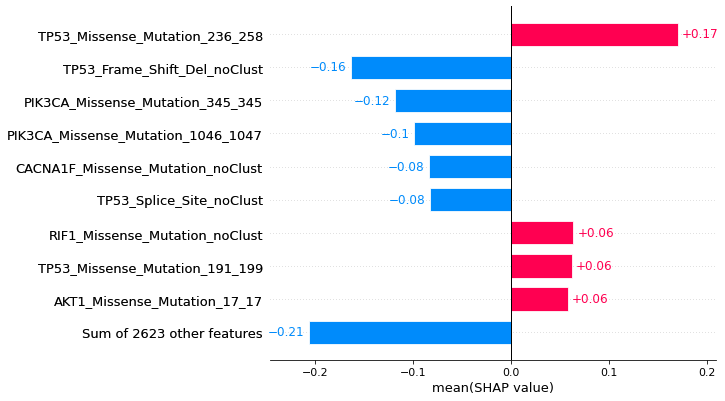

In [89]:
y_pred_simple_Lasso, feature_names_simple_Lasso = Lasso(normalized_X_train, normalized_X_test, y_train, y_test)

285 features have a coefficent different from zero.

### Study of the function Lasso

In [90]:
clf_simple_LogRegr = LogisticRegression(penalty="l1", solver="liblinear", tol=1e-6, max_iter=10000, warm_start=False, intercept_scaling=10000.0, C=2.57)   

In [91]:
clf_simple_LogRegr.fit(normalized_X_train, y_train)

Liblinear failed to converge, increase the number of iterations.


LogisticRegression(C=2.57, intercept_scaling=10000.0, max_iter=10000,
                   penalty='l1', solver='liblinear', tol=1e-06)

In [92]:
y_pred_simple_Lasso = clf_simple_LogRegr.predict(normalized_X_test)

In [93]:
y_pred_simple_Lasso

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1], dtype=int64)

In [94]:
print(classification_report(y_test, y_pred))

BR-M-045               1
TCGA-A2-A0YE           1
TCGA-AN-A0AL           1
MBC_132                1
TCGA-OL-A5S0           1
                      ..
MBC_72                 0
MBC_183                0
MBC_199                0
MBCProject_LVSjf8h7    0
MBCProject_pktAIxFb    0
Name: Target, Length: 146, dtype: int64

## Evaluate the model with classification metrics 

In [95]:
# Test accuracy 
accuracy_simple_LassoLogRegr = np.mean(y_test == y_pred_simple_Lasso)
print("Accuracy:", accuracy_simple_LassoLogRegr)

Accuracy: 0.7671232876712328


In [96]:
# build the confusion matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix

cm_simple_LassoLogRegr = confusion_matrix(y_test, y_pred_simple_Lasso)
print(cm_simple_LassoLogRegr)

[[60 13]
 [21 52]]


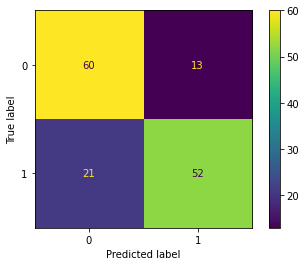

In [97]:
# Plot test confusion matrix
plot_confusion_matrix(clf_simple_LogRegr, normalized_X_test, y_test)

In [86]:
# precision: TP/(TP+FP) accuracy of the positive prediction
def precision(cm):
    TP = cm[1,1]
    TPFP = cm[:,1].sum()
    return TP / TPFP

In [99]:
print("Precision ", precision(cm_simple_LassoLogRegr))

Precision  0.8


In [87]:
# Recall:  TP/(TP+FN) ratio of positive instances correctly detected by the classifier
def recall(cm):
    TP = cm[1,1]
    T = cm[1,:].sum()
    return TP / T

In [101]:
print("Recall:", recall(cm_simple_LassoLogRegr))

Recall: 0.7123287671232876


In [88]:
# F1 score: 2 * precision_RF * recall_RF / (precision_RF + recall_RF)
def f1(cm):
    p = precision(cm)
    r = recall(cm)
    return (2 * p * r) / (p + r)

In [103]:
print("F1:", f1(cm_simple_LassoLogRegr))

F1: 0.7536231884057971


In [89]:
# MCC (Matthews correlation coefficient)

def mcc(y_true, y_pred):
    tp = np.sum(np.logical_and(y_true == 1, y_pred == 1))
    tn = np.sum(np.logical_and(y_true == 0, y_pred == 0))
    fp = np.sum(np.logical_and(y_true == 0, y_pred == 1))
    fn = np.sum(np.logical_and(y_true == 1, y_pred == 0))
    
    numerator = (tp * tn) - (fp * fn)
    denominator = np.sqrt((tp + fp) * (tp + fn) * (tn + fp) * (tn + fn))
    
    mcc_value = numerator / denominator
    return mcc_value

In [105]:
tp = np.sum(np.logical_and(y_test == 1, y_pred_simple_Lasso == 1))
tp

52

In [106]:
tn = np.sum(np.logical_and(y_test == 0, y_pred_simple_Lasso == 0))
tn

60

In [107]:
fp = np.sum(np.logical_and(y_test == 0, y_pred_simple_Lasso == 1))
fp

13

In [108]:
fn = np.sum(np.logical_and(y_test == 1, y_pred_simple_Lasso == 0))
fn

21

In [109]:
print("MCC:", mcc(y_test, y_pred_simple_Lasso))

MCC: 0.53748384988657


In [84]:
feature_names_lista_simple_Lasso = list(feature_names_simple_Lasso)
feature_names_lista_simple_Lasso

['TP53_Missense_Mutation_270_276',
 'PIK3CA_Missense_Mutation_1046_1047',
 'TP53_Missense_Mutation_173_225',
 'TP53_Missense_Mutation_236_258',
 'GATA3_Frame_Shift_Ins_308_335',
 'PIK3CA_Missense_Mutation_545_546',
 'TP53_Nonsense_Mutation_173_225',
 'PIK3CA_Missense_Mutation_541_542',
 'TP53_Frame_Shift_Del_173_225',
 'GATA3_Frame_Shift_Ins_406_408',
 'AKT1_Missense_Mutation_17_17',
 'TMPRSS13_Missense_Mutation_77_83',
 'PIK3CA_Missense_Mutation_102_113',
 'TP53_Frame_Shift_Ins_173_225',
 'TP53_Frame_Shift_Del_236_258',
 'TP53_Splice_Site_173_225',
 'PIK3CA_In_Frame_Del_102_113',
 'TP53_In_Frame_Del_173_225',
 'GRB7_Missense_Mutation_37_55',
 'TP53_Frame_Shift_Ins_236_258',
 'PIK3R1_In_Frame_Del_566_578',
 'ERBB2_In_Frame_Ins_767_777',
 'PIK3CA_In_Frame_Ins_102_113',
 'PODXL_Splice_Site_268_268',
 'TP53_Nonsense_Mutation_noClust',
 'TP53_Missense_Mutation_noClust',
 'COL6A6_Missense_Mutation_noClust',
 'PIK3CA_Missense_Mutation_noClust',
 'PTEN_Frame_Shift_Ins_noClust',
 'TP53_Frame_S

In [85]:
len(feature_names_lista_simple_Lasso)

174

# Ridge Logistic Regression

## Grid search to find the optimal parameter for Ridge regression

GridSearchCV(cv=5,
             estimator=LogisticRegression(max_iter=10000, solver='liblinear'),
             param_grid={'C': array([1.00000000e-02, 2.57384615e+00, 5.13769231e+00, 7.70153846e+00,
       1.02653846e+01, 1.28292308e+01, 1.53930769e+01, 1.79569231e+01,
       2.05207692e+01, 2.30846154e+01, 2.56484615e+01, 2.82123077e+01,
       3.07761538e+01, 3.33400000e+01, 3.59038462e+01, 3.84676923e+01,
       4.103...1, 4.35953846e+01, 4.61592308e+01, 4.87230769e+01,
       5.12869231e+01, 5.38507692e+01, 5.64146154e+01, 5.89784615e+01,
       6.15423077e+01, 6.41061538e+01, 6.66700000e+01, 6.92338462e+01,
       7.17976923e+01, 7.43615385e+01, 7.69253846e+01, 7.94892308e+01,
       8.20530769e+01, 8.46169231e+01, 8.71807692e+01, 8.97446154e+01,
       9.23084615e+01, 9.48723077e+01, 9.74361538e+01, 1.00000000e+02])})

Best C for Ridge logistic regression:  0.01
Best cross-validation score:  0.7408568443051202


Text(0.5, 0, 'C')

Text(0, 0.5, 'CV-Accuracy')

Text(0.5, 1.0, 'Grid Search Results for Ridge Logistic Regression')

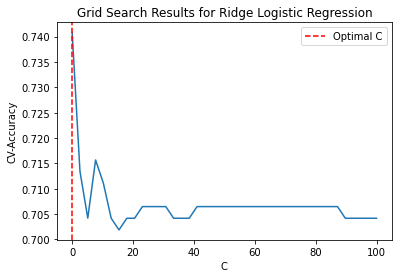

In [90]:
# Create a grid of alpha values for Ridge regularization
param_grid = {'C': np.linspace(0.01, 100, 40)}

# Create a logistic regression model with Ridge regularization (L2)
ridge_model = LogisticRegression(penalty='l2', solver='liblinear', max_iter=10000)

# Perform grid search with cross-validation (cv=5)
grid_search = GridSearchCV(ridge_model, param_grid, cv=5)
grid_search.fit(normalized_X_train, y_train)

# Print the best C value
print("Best C for Ridge logistic regression: ", grid_search.best_estimator_.C)

# Print the best cross-validation score
print("Best cross-validation score: ", grid_search.best_score_)

C_values = np.linspace(0.01, 100, 40)
accuracy_scores = grid_search.cv_results_['mean_test_score']

max_accuracy = np.max(accuracy_scores)
best_C = C_values[np.argmax(accuracy_scores)]

plt.plot(C_values, accuracy_scores)
plt.axvline(x=best_C, color='r', linestyle='--', label='Optimal C')
plt.xlabel('C')
plt.ylabel('CV-Accuracy')
plt.title('Grid Search Results for Ridge Logistic Regression')
plt.legend()
plt.show()

Best lambda (alpha) for Ridge logistic regression: 100 (C=0.01).

### Compute the classification metrics on the cross-validation results 

In [91]:
# POSITIVE CLASS (1)

# After fitting the grid search, calculate metrics using cross_val_predict
best_ridge_model = grid_search.best_estimator_  # Get the best Ridge model with the optimal C

# Use cross_val_predict to get predictions for each fold in cross-validation
y_pred_Ridge = cross_val_predict(best_ridge_model, normalized_X_train, y_train, cv=5)

# Calculate accuracy for each fold
accuracy_scores_R = cross_val_score(best_ridge_model, normalized_X_train, y_train, cv=5, scoring='accuracy')
# Calculate precision, recall and F1 for each fold
# By default, precision, recall and F1 refer to the positive class (1)
precision_scores_1_R = cross_val_score(best_ridge_model, normalized_X_train, y_train, cv=5, scoring='precision')
recall_scores_1_R = cross_val_score(best_ridge_model, normalized_X_train, y_train, cv=5, scoring='recall')
f1_scores_1_R = cross_val_score(best_ridge_model, normalized_X_train, y_train, cv=5, scoring='f1')

# Calculate the mean cross-validation precision and recall
mean_accuracy_R = np.mean(accuracy_scores_R)
std_accuracy_R = np.std(accuracy_scores_R)
mean_precision_1_R = np.mean(precision_scores_1_R)
std_precision_1_R = np.std(precision_scores_1_R)
mean_recall_1_R = np.mean(recall_scores_1_R)
std_recall_1_R = np.std(recall_scores_1_R)
mean_f1_1_R = np.mean(f1_scores_1_R)
std_f1_1_R = np.std(f1_scores_1_R)


# Print the mean cross-validation precision and recall
print("Mean Cross-Validation Accuracy:", mean_accuracy_R)
print("Standard Deviation of Accuracy:", std_accuracy_R)
print("Mean Cross-Validation Precision - 1:", mean_precision_1_R)
print("Standard Deviation of Precision - 1:", std_precision_1_R)
print("Mean Cross-Validation Recall - 1:", mean_recall_1_R)
print("Standard Deviation of Recall - 1:", std_recall_1_R)
print("Mean Cross-Validation F1-score - 1:", mean_f1_1_R)
print("Standard Deviation of F1-score - 1:", std_f1_1_R)

Mean Cross-Validation Accuracy: 0.7408568443051202
Standard Deviation of Accuracy: 0.06512199143524715
Mean Cross-Validation Precision - 1: 0.7154571779469917
Standard Deviation of Precision - 1: 0.043823868775546
Mean Cross-Validation Recall - 1: 0.7943974630021142
Standard Deviation of Recall - 1: 0.11788957728961659
Mean Cross-Validation F1-score - 1: 0.7506189125528341
Standard Deviation of F1-score - 1: 0.07367959173086533


In [92]:
# NEGATIVE CLASS (0) 

# 1) PRECISION
# 'make_scorer' defines a custom scoring function for precision of class 0
# 'precision_score' is the scoring function that you want to use as a base
# 'pos_label=0' specifies that you want to calculate precision for class 0
precision_scorer_class0_R = make_scorer(precision_score, pos_label=0)

# Calculate precision for class 0 (negative class)
precision_scores_0_R = cross_val_score(best_ridge_model, normalized_X_train, y_train, cv=5, scoring=precision_scorer_class0_R)

# 2) RECALL 
# Define a custom scorer for recall of class 0
recall_scorer_class0_R = make_scorer(recall_score, pos_label=0)

# Calculate recall for class 0 (negative class)
recall_scores_0_R = cross_val_score(best_ridge_model, normalized_X_train, y_train, cv=5, scoring=recall_scorer_class0_R)

# 3) F1-SCORE
# Define a custom scorer for F1-score of class 0
f1_scorer_class0_R = make_scorer(f1_score, pos_label=0)

# Calculate F1-score for class 0 (negative class)
f1_scores_0_R = cross_val_score(best_ridge_model, normalized_X_train, y_train, cv=5, scoring=f1_scorer_class0_R)

# compute the mean and the standard deviation
mean_precision_0_R = np.mean(precision_scores_0_R)
std_precision_0_R = np.std(precision_scores_0_R)
mean_recall_0_R = np.mean(recall_scores_0_R)
std_recall_0_R = np.std(recall_scores_0_R)
mean_f1_0_R = np.mean(f1_scores_0_R)
std_f1_0_R = np.std(f1_scores_0_R)

print("Mean Cross-Validation Precision - 0:", mean_precision_0_R)
print("Standard Deviation of Precision - 0:", std_precision_0_R)
print("Mean Cross-Validation Recall - 0:", mean_recall_0_R)
print("Standard Deviation of Recall - 0:", std_recall_0_R)
print("Mean Cross-Validation F1-score: - 0", mean_f1_0_R)
print("Standard Deviation of F1-score: - 0", std_f1_0_R)

Mean Cross-Validation Precision - 0: 0.7817698454459795
Standard Deviation of Precision - 0: 0.10473472296455377
Mean Cross-Validation Recall - 0: 0.687737843551797
Standard Deviation of Recall - 0: 0.03987793639539866
Mean Cross-Validation F1-score: - 0 0.7285176163897779
Standard Deviation of F1-score: - 0 0.055844524573299734


## Ridge on the test set

In [93]:
def Ridge(X_train, X_test, y_train, y_test):

# Definizione dell'istanza del modello
    clf = LogisticRegression(penalty="l2", solver="liblinear" , tol=1e-6, max_iter=int(1e6), warm_start=False, intercept_scaling=10000.0, random_state = 123, C=0.01)

# Addestramento del modello sui dati di training
    clf.fit(X_train, y_train)

# Predizione sui dati di test
    y_pred = clf.predict(X_test)

# Valutazione del modello
    print(classification_report(y_test, y_pred))
    
    coef_indexes = clf.coef_[0].nonzero()[0]

    # Numero delle feature con coefficiente diverso da zero
    n_features = len(coef_indexes)

    # Nomi delle feature con coefficiente diverso da zero
    feature_names = X.columns[coef_indexes]

    print(f"Numero di feature con coefficiente diverso da zero: {n_features}")
    print(f"Nomi delle feature con coefficiente diverso da zero: {feature_names}")
    
    explainer = shap.Explainer(clf, X_train)

    # Calcola i valori Shapley per le feature del modello addestrato
    shap_values = explainer(X_test)

    # Visualizza un grafico delle feature più importanti
    shap.plots.bar(shap_values.mean(0))

    return (y_pred, feature_names)

              precision    recall  f1-score   support

           0       0.67      0.88      0.76        73
           1       0.82      0.56      0.67        73

    accuracy                           0.72       146
   macro avg       0.74      0.72      0.71       146
weighted avg       0.74      0.72      0.71       146

Numero di feature con coefficiente diverso da zero: 2188
Nomi delle feature con coefficiente diverso da zero: Index(['TP53_Missense_Mutation_270_282', 'MAML3_In_Frame_Ins_503_503',
       'PIK3CA_Missense_Mutation_1046_1047', 'TP53_Missense_Mutation_173_177',
       'TP53_Missense_Mutation_236_258', 'GATA3_Frame_Shift_Ins_308_335',
       'PIK3CA_Missense_Mutation_545_546', 'ERBB2_Missense_Mutation_767_777',
       'GATA3_Splice_Site_308_335', 'TP53_Nonsense_Mutation_191_199',
       ...
       'CYTIP_Splice_Site_noClust', 'KIAA0355_Splice_Region_noClust',
       'SETDB1_3'UTR_noClust', 'PZP_Intron_noClust',
       'SLC26A9_Splice_Region_noClust', 'GARNL3_Nonsense_

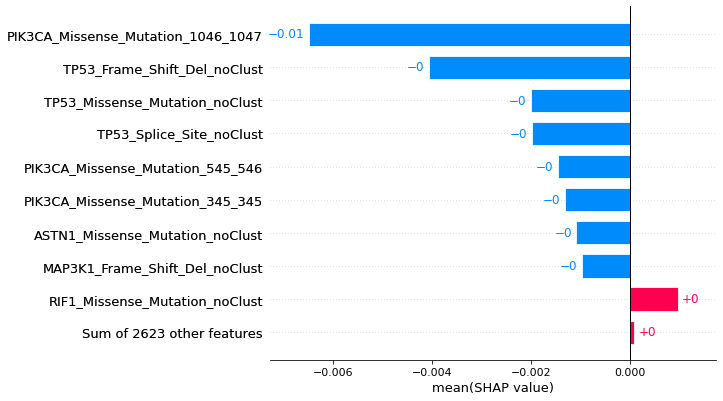

In [94]:
y_pred_simple_Ridge, feature_names_simple_Ridge = Ridge(normalized_X_train, normalized_X_test, y_train, y_test)

### Study of the function Ridge

In [95]:
clf_simple_LogRegr_Ridge = LogisticRegression(penalty="l2", solver="liblinear" , tol=1e-6, max_iter=int(1e6), warm_start=False, intercept_scaling=10000.0, random_state = 123, C=0.01)

In [96]:
clf_simple_LogRegr_Ridge.fit(normalized_X_train, y_train)

LogisticRegression(C=0.01, intercept_scaling=10000.0, max_iter=1000000,
                   random_state=123, solver='liblinear', tol=1e-06)

In [97]:
y_pred_simple_Ridge = clf_simple_LogRegr_Ridge.predict(normalized_X_test)

In [98]:
y_pred_simple_Ridge

array([1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1,
       1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

## Evaluate the model with classification metrics - Ridge Logistic Regression

In [99]:
# Test accuracy 
accuracy_simple_RidgeLogRegr = np.mean(y_test == y_pred_simple_Ridge)
print("Accuracy:", accuracy_simple_RidgeLogRegr)

Accuracy: 0.7191780821917808


In [100]:
cm_simple_RidgeLogRegr = confusion_matrix(y_test, y_pred_simple_Ridge)
print(cm_simple_RidgeLogRegr)

[[64  9]
 [32 41]]


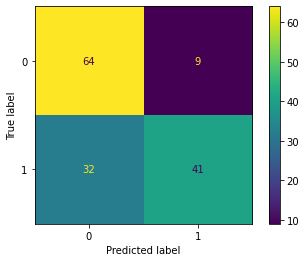

In [101]:
# Plot test confusion matrix
plot_confusion_matrix(clf_simple_LogRegr_Ridge, normalized_X_test, y_test)

In [107]:
print("Precision ", precision(cm_simple_RidgeLogRegr))

Precision  0.82


In [108]:
print("Recall:", recall(cm_simple_RidgeLogRegr))

Recall: 0.5616438356164384


In [109]:
print("F1:", f1(cm_simple_RidgeLogRegr))

F1: 0.6666666666666667


In [110]:
tp = np.sum(np.logical_and(y_test == 1, y_pred_simple_Ridge == 1))
tp

41

In [111]:
tn = np.sum(np.logical_and(y_test == 0, y_pred_simple_Ridge == 0))
tn

64

In [112]:
fp = np.sum(np.logical_and(y_test == 0, y_pred_simple_Ridge == 1))
fp

9

In [113]:
fn = np.sum(np.logical_and(y_test == 1, y_pred_simple_Ridge == 0))
fn

32

In [114]:
print("MCC:", mcc(y_test, y_pred_simple_Ridge))

MCC: 0.4618802153517006


# Full Logistic Regression

## Cross-validation

In [90]:
# Create a Logistic Regression model without regularization
logreg_model = LogisticRegression(solver="newton-cg", penalty='none')

# Perform cross-validation (e.g., 5-fold cross-validation)
cv_scores = cross_val_score(logreg_model, normalized_X_train, y_train, cv=5, scoring='accuracy')

# Print the cross-validation scores
print("Cross-Validation Scores:", cv_scores)
print("Mean CV Accuracy:", cv_scores.mean())

Cross-Validation Scores: [0.67045455 0.70114943 0.75862069 0.67816092 0.6091954 ]
Mean CV Accuracy: 0.6835161964472309


In [91]:
## POSITIVE CLASS (1)

# Use cross_val_predict to get predictions for each fold in cross-validation
y_pred_logreg = cross_val_predict(logreg_model, normalized_X_train, y_train, cv=5)

# Calculate accuracy for each fold
accuracy_scores_logreg = cross_val_score(logreg_model, normalized_X_train, y_train, cv=5, scoring='accuracy')
# Calculate precision, recall and F1 for each fold
# By default, precision, recall and F1 refer to the positive class (1)
precision_scores_1_logreg = cross_val_score(logreg_model, normalized_X_train, y_train, cv=5, scoring='precision')
recall_scores_1_logreg = cross_val_score(logreg_model, normalized_X_train, y_train, cv=5, scoring='recall')
f1_scores_1_logreg = cross_val_score(logreg_model, normalized_X_train, y_train, cv=5, scoring='f1')

# Calculate the mean cross-validation precision and recall
mean_accuracy_logreg = np.mean(accuracy_scores_logreg)
std_accuracy_logreg = np.std(accuracy_scores_logreg)
mean_precision_1_logreg = np.mean(precision_scores_1_logreg)
std_precision_1_logreg = np.std(precision_scores_1_logreg)
mean_recall_1_logreg = np.mean(recall_scores_1_logreg)
std_recall_1_logreg = np.std(recall_scores_1_logreg)
mean_f1_1_logreg = np.mean(f1_scores_1_logreg)
std_f1_1_logreg = np.std(f1_scores_1_logreg)


# Print the mean cross-validation precision and recall
print("Mean Cross-Validation Accuracy:", mean_accuracy_logreg)
print("Standard Deviation of Accuracy:", std_accuracy_logreg)
print("Mean Cross-Validation Precision - 1:", mean_precision_1_logreg)
print("Standard Deviation of Precision - 1:", std_precision_1_logreg)
print("Mean Cross-Validation Recall - 1:", mean_recall_1_logreg)
print("Standard Deviation of Recall - 1:", std_recall_1_logreg)
print("Mean Cross-Validation F1-score - 1:", mean_f1_1_logreg)
print("Standard Deviation of F1-score - 1:", std_f1_1_logreg)

Mean Cross-Validation Accuracy: 0.6835161964472309
Standard Deviation of Accuracy: 0.048320765349073806
Mean Cross-Validation Precision - 1: 0.7081540902250284
Standard Deviation of Precision - 1: 0.05287115710689996
Mean Cross-Validation Recall - 1: 0.6286469344608879
Standard Deviation of Recall - 1: 0.07050478455708935
Mean Cross-Validation F1-score - 1: 0.664222547967747
Standard Deviation of F1-score - 1: 0.05331397478295301


In [92]:
# NEGATIVE CLASS (0) 

# 1) PRECISION
# 'make_scorer' defines a custom scoring function for precision of class 0
# 'precision_score' is the scoring function that you want to use as a base
# 'pos_label=0' specifies that you want to calculate precision for class 0
precision_scorer_class0_logreg = make_scorer(precision_score, pos_label=0)

# Calculate precision for class 0 (negative class)
precision_scores_0_logreg = cross_val_score(logreg_model, normalized_X_train, y_train, cv=5, scoring=precision_scorer_class0_logreg)

# 2) RECALL 
# Define a custom scorer for recall of class 0
recall_scorer_class0_logreg = make_scorer(recall_score, pos_label=0)

# Calculate recall for class 0 (negative class)
recall_scores_0_logreg = cross_val_score(logreg_model, normalized_X_train, y_train, cv=5, scoring=recall_scorer_class0_logreg)

# 3) F1-SCORE
# Define a custom scorer for F1-score of class 0
f1_scorer_class0_logreg = make_scorer(f1_score, pos_label=0)

# Calculate F1-score for class 0 (negative class)
f1_scores_0_logreg = cross_val_score(logreg_model, normalized_X_train, y_train, cv=5, scoring=f1_scorer_class0_logreg)

# compute the mean and the standard deviation
mean_precision_0_logreg = np.mean(precision_scores_0_logreg)
std_precision_0_logreg = np.std(precision_scores_0_logreg)
mean_recall_0_logreg = np.mean(recall_scores_0_logreg)
std_recall_0_logreg = np.std(recall_scores_0_logreg)
mean_f1_0_logreg = np.mean(f1_scores_0_logreg)
std_f1_0_logreg = np.std(f1_scores_0_logreg)

print("Mean Cross-Validation Precision - 0:", mean_precision_0_logreg)
print("Standard Deviation of Precision - 0:", std_precision_0_logreg)
print("Mean Cross-Validation Recall - 0:", mean_recall_0_logreg)
print("Standard Deviation of Recall - 0:", std_recall_0_logreg)
print("Mean Cross-Validation F1-score: - 0", mean_f1_0_logreg)
print("Standard Deviation of F1-score: - 0", std_f1_0_logreg)

Mean Cross-Validation Precision - 0: 0.6666339810444157
Standard Deviation of Precision - 0: 0.04966807172577533
Mean Cross-Validation Recall - 0: 0.7378435517970401
Standard Deviation of Recall - 0: 0.06550926825121857
Mean Cross-Validation F1-score: - 0 0.6991525876324831
Standard Deviation of F1-score: - 0 0.04893077849787709


## Full Logistic Regression on the test set 

In [93]:
def Full_LogReg(X_train, X_test, y_train, y_test):

# Definizione dell'istanza del modello
         clf_logreg = LogisticRegression(solver="newton-cg", penalty='none') 
# Addestramento del modello sui dati di training 
         clf_logreg.fit(X_train, y_train)  
# Predizione sui dati di test
         y_pred = clf_logreg.predict(X_test)
# Valutazione del modello
         print(classification_report(y_test, y_pred))
    
         return(y_pred)

In [94]:
y_pred_logreg = Full_LogReg(normalized_X_train, normalized_X_test, y_train, y_test)

              precision    recall  f1-score   support

           0       0.68      0.82      0.75        73
           1       0.78      0.62      0.69        73

    accuracy                           0.72       146
   macro avg       0.73      0.72      0.72       146
weighted avg       0.73      0.72      0.72       146



### Study of the full logistic regression function

In [95]:
clf_simple_LogRegr_Full = LogisticRegression(solver="newton-cg", penalty='none')

In [96]:
clf_simple_LogRegr_Full.fit(normalized_X_train, y_train)

LogisticRegression(penalty='none', solver='newton-cg')

In [97]:
y_pred_full_logreg = clf_simple_LogRegr_Full.predict(normalized_X_test)

In [98]:
y_pred_full_logreg

array([1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1], dtype=int64)

## Evaluate the model with classification metrics - Ridge Logistic Regression

In [99]:
# Test accuracy 
accuracy_full_logreg = np.mean(y_test == y_pred_full_logreg)
print("Accuracy:", accuracy_full_logreg)

Accuracy: 0.7191780821917808


In [100]:
cm_full_logreg = confusion_matrix(y_test, y_pred_full_logreg)
print(cm_full_logreg)

[[60 13]
 [28 45]]


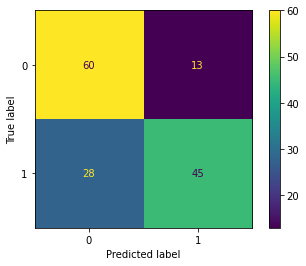

In [101]:
# Plot test confusion matrix
plot_confusion_matrix(clf_simple_LogRegr_Full, normalized_X_test, y_test)

In [102]:
print("Precision ", precision(cm_full_logreg))

Precision  0.7758620689655172


In [103]:
print("Recall:", recall(cm_full_logreg))

Recall: 0.6164383561643836


In [104]:
print("F1:", f1(cm_full_logreg))

F1: 0.6870229007633589


In [105]:
tp = np.sum(np.logical_and(y_test == 1, y_pred_full_logreg == 1))
tp

45

In [106]:
tn = np.sum(np.logical_and(y_test == 0, y_pred_full_logreg == 0))
tn

60

In [107]:
fp = np.sum(np.logical_and(y_test == 0, y_pred_full_logreg == 1))
fp

13

In [108]:
fn = np.sum(np.logical_and(y_test == 1, y_pred_full_logreg == 0))
fn

28

In [109]:
print("MCC:", mcc(y_test, y_pred_full_logreg))

MCC: 0.44791400876468346


# Support Vector Machine (SVM)

The SVM algorithm finds a robust solution to the linearly separable problem. That is, there exists a hyperplane $\mathcal{H}_{\left(\mathbf{w}, w_{0}\right)} = \mathbf{w}^{T} \cdot \mathbf{x}+w_{0}=0$, that separates two categories:

$\left\{\begin{array}{ll}{\mathbf{w}^{T} \cdot \mathbf{x}_{i}+w_{0} \geqslant 1,} & {\text { if } y_{i}=+1} \\ {\mathbf{w}^{T} \cdot \mathbf{x}_{i}+w_{0} \leqslant-1,} & {\text { if } y_{i}=-1}\end{array}\right.$

Every training point is either above the hyperplane $\mathcal{H}_{\left(\mathbf{w}, w_{0} - 1\right)}$ or below the hyperplane $\mathcal{H}_{\left(\mathbf{w}, w_{0} + 1\right)}$ . We call them *marginal hyperplanes*. Of course there are infinitely many hyperplanes for which the condition is satisfied, but the **hyperplane with the largest margin** is the one that appears in the Support Vector Machine model. **Margin** is the distance between marginal hyperplanes $M=1 /\|\mathbf{w}\|$.

### Linearly Separable case (hard margins)

Is the solution to the optimization problem:

$\min _{\mathbf{w}, w_{0}}\left\{\frac{1}{2}\|\mathbf{w}\|^{2}\right\}$

$\left\{\begin{array}{ll}{\mathbf{w}^{T} \cdot \mathbf{x}_{i}+w_{0} \geqslant 1,} & {\text { if } y_{i}=+1} \\ {\mathbf{w}^{T} \cdot \mathbf{x}_{i}+w_{0} \leqslant-1,} & {\text { if } y_{i}=-1}\end{array}\right.$


## 1) Linear Kernel

## Grid search to find the optimal parameter for Support Vector Machine

Let's tune the regularization parameter C that controls the trade-off between maximizing the margin (separating the data points as well as possible) and minimizing the classification error (allowing some data points to be misclassified). It's often referred to as the "soft margin" parameter because it allows for some level of misclassification within the training data.

- **Small C (Strong Regularization)**: when 'C' is small, the SVM optimization will focus on finding the largest margin even if it results in some training data points being misclassified. In other words, the model is penalized more for misclassifying data points and, as a result, may have a narrower margin. This is useful when there's a lot of noise in the data, and the goal is to have a more robust and generalized model.
- **Large C (Weak Regularization)**: when 'C' is large, the SVM optimization will strive to classify all training data points correctly, even if it means having a smaller margin. In this case, the model is penalized less for misclassification, and it may be more prone to overfitting the training data. This can be useful when the training data is well-behaved and the goal is to maximize the accuracy on the training data.

GridSearchCV(cv=5, estimator=SVC(kernel='linear'),
             param_grid={'C': array([1.00000000e-02, 2.57384615e+00, 5.13769231e+00, 7.70153846e+00,
       1.02653846e+01, 1.28292308e+01, 1.53930769e+01, 1.79569231e+01,
       2.05207692e+01, 2.30846154e+01, 2.56484615e+01, 2.82123077e+01,
       3.07761538e+01, 3.33400000e+01, 3.59038462e+01, 3.84676923e+01,
       4.10315385e+01, 4.35953846e+01, 4.61592308e+01, 4.87230769e+01,
       5.12869231e+01, 5.38507692e+01, 5.64146154e+01, 5.89784615e+01,
       6.15423077e+01, 6.41061538e+01, 6.66700000e+01, 6.92338462e+01,
       7.17976923e+01, 7.43615385e+01, 7.69253846e+01, 7.94892308e+01,
       8.20530769e+01, 8.46169231e+01, 8.71807692e+01, 8.97446154e+01,
       9.23084615e+01, 9.48723077e+01, 9.74361538e+01, 1.00000000e+02])},
             scoring='accuracy')

Best 'C' for Linear SVM: 5.137692307692308
Best cv accuracy: 0.6881922675026122


Text(0.5, 0, 'C')

Text(0, 0.5, 'CV-Accuracy')

Text(0.5, 1.0, 'Grid Search Results for Linear Kernel SVM')

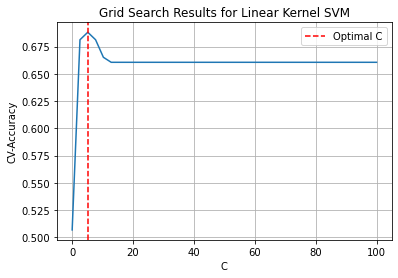

In [115]:
# Define the range of 'C' values to test
param_grid = {'C': np.linspace(0.01, 100, 40)}

# Create a linear kernel SVM and perform grid search
linear_svm = GridSearchCV(SVC(kernel='linear'), param_grid, cv=5, scoring='accuracy', refit=True)
linear_svm.fit(normalized_X_train, y_train)

# Print the best 'C' value and its corresponding accuracy
best_C = linear_svm.best_params_['C']
best_cv_accuracy = linear_svm.best_score_

print("Best 'C' for Linear SVM:", best_C)
print("Best cv accuracy:", best_cv_accuracy)

# Get the best model (trained with the best 'C' value)
best_linear_svm_model = linear_svm.best_estimator_

C_values = np.linspace(0.01, 100, 40)
accuracy_scores = linear_svm.cv_results_['mean_test_score']

best_C = C_values[np.argmax(accuracy_scores)]
max_accuracy = np.max(accuracy_scores)

# Plot the C values against cross-validation accuracy
plt.plot(C_values, accuracy_scores)
plt.axvline(x=best_C, color='r', linestyle='--', label='Optimal C')
plt.xlabel('C')
plt.ylabel('CV-Accuracy')
plt.title('Grid Search Results for Linear Kernel SVM')
plt.legend()
plt.grid()
plt.show()

Best C for Linear SVM: 5.14

### Compute the classification metrics on the cross-validation results

In [116]:
# POSITIVE CLASS (1)

# After fitting the grid search, calculate metrics using cross_val_predict
best_linear_svm_model = linear_svm.best_estimator_  # Get the best Linear SVM model with the optimal C

# Use cross_val_predict to get predictions for each fold in cross-validation
y_pred_linear_svm = cross_val_predict(best_linear_svm_model, normalized_X_train, y_train, cv=5)

# Calculate accuracy for each fold
accuracy_scores_linear_svm = cross_val_score(best_linear_svm_model, normalized_X_train, y_train, cv=5, scoring='accuracy')
# Calculate precision, recall and F1 for each fold
# By default, precision, recall and F1 refer to the positive class (1)
precision_scores_1_linear_svm = cross_val_score(best_linear_svm_model, normalized_X_train, y_train, cv=5, scoring='precision')
recall_scores_1_linear_svm = cross_val_score(best_linear_svm_model, normalized_X_train, y_train, cv=5, scoring='recall')
f1_scores_1_linear_svm = cross_val_score(best_linear_svm_model, normalized_X_train, y_train, cv=5, scoring='f1')

# Calculate the mean cross-validation precision and recall
mean_accuracy_linear_svm = np.mean(accuracy_scores_linear_svm)
std_accuracy_linear_svm = np.std(accuracy_scores_linear_svm)
mean_precision_1_linear_svm = np.mean(precision_scores_1_linear_svm)
std_precision_1_linear_svm = np.std(precision_scores_1_linear_svm)
mean_recall_1_linear_svm = np.mean(recall_scores_1_linear_svm)
std_recall_1_linear_svm = np.std(recall_scores_1_linear_svm)
mean_f1_1_linear_svm = np.mean(f1_scores_1_linear_svm)
std_f1_1_linear_svm = np.std(f1_scores_1_linear_svm)


# Print the mean cross-validation precision and recall
print("Mean Cross-Validation Accuracy:", mean_accuracy_linear_svm)
print("Standard Deviation of Accuracy:", std_accuracy_linear_svm)
print("Mean Cross-Validation Precision - 1:", mean_precision_1_linear_svm)
print("Standard Deviation of Precision - 1:", std_precision_1_linear_svm)
print("Mean Cross-Validation Recall - 1:", mean_recall_1_linear_svm)
print("Standard Deviation of Recall - 1:", std_recall_1_linear_svm)
print("Mean Cross-Validation F1-score - 1:", mean_f1_1_linear_svm)
print("Standard Deviation of F1-score - 1:", std_f1_1_linear_svm)

Mean Cross-Validation Accuracy: 0.6881922675026122
Standard Deviation of Accuracy: 0.05125325275952705
Mean Cross-Validation Precision - 1: 0.7114353735922577
Standard Deviation of Precision - 1: 0.04735596925433124
Mean Cross-Validation Recall - 1: 0.6331923890063426
Standard Deviation of Recall - 1: 0.0932961354124037
Mean Cross-Validation F1-score - 1: 0.6673871169480925
Standard Deviation of F1-score - 1: 0.06464823664545742


In [117]:
# NEGATIVE CLASS (0)

# 1) PRECISION
# 'make_scorer' defines a custom scoring function for precision of class 0
# 'precision_score' is the scoring function that you want to use as a base
# 'pos_label=0' specifies that you want to calculate precision for class 0
precision_scorer_class0_linear_svm = make_scorer(precision_score, pos_label=0)

# Calculate precision for class 0 (negative class)
precision_scores_0_linear_svm = cross_val_score(best_linear_svm_model, normalized_X_train, y_train, cv=5, scoring=precision_scorer_class0_linear_svm)

# 2) RECALL 
# Define a custom scorer for recall of class 0
recall_scorer_class0_linear_svm = make_scorer(recall_score, pos_label=0)

# Calculate recall for class 0 (negative class)
recall_scores_0_linear_svm = cross_val_score(best_linear_svm_model, normalized_X_train, y_train, cv=5, scoring=recall_scorer_class0_linear_svm)

# 3) F1-SCORE
# Define a custom scorer for F1-score of class 0
f1_scorer_class0_linear_svm = make_scorer(f1_score, pos_label=0)

# Calculate F1-score for class 0 (negative class)
f1_scores_0_linear_svm = cross_val_score(best_linear_svm_model, normalized_X_train, y_train, cv=5, scoring=f1_scorer_class0_linear_svm)

# compute the mean and the standard deviation
mean_precision_0_linear_svm = np.mean(precision_scores_0_linear_svm)
std_precision_0_linear_svm = np.std(precision_scores_0_linear_svm)
mean_recall_0_linear_svm = np.mean(recall_scores_0_linear_svm)
std_recall_0_linear_svm = np.std(recall_scores_0_linear_svm)
mean_f1_0_linear_svm = np.mean(f1_scores_0_linear_svm)
std_f1_0_linear_svm = np.std(f1_scores_0_linear_svm)

print("Mean Cross-Validation Precision - 0:", mean_precision_0_linear_svm)
print("Standard Deviation of Precision - 0:", std_precision_0_linear_svm)
print("Mean Cross-Validation Recall - 0:", mean_recall_0_linear_svm)
print("Standard Deviation of Recall - 0:", std_recall_0_linear_svm)
print("Mean Cross-Validation F1-score: - 0", mean_f1_0_linear_svm)
print("Standard Deviation of F1-score: - 0", std_f1_0_linear_svm)

Mean Cross-Validation Precision - 0: 0.6736089066213291
Standard Deviation of Precision - 0: 0.05962296851286168
Mean Cross-Validation Recall - 0: 0.7426004228329809
Standard Deviation of Recall - 0: 0.055512431109910595
Mean Cross-Validation F1-score: - 0 0.7045372530967084
Standard Deviation of F1-score: - 0 0.04492248509332132


## Linear SVM on the test set 

In [118]:
def LinearSVM(X_train, X_test, y_train, y_test):
    # Create an instance of the Linear SVM model
    clf = SVC(kernel='linear', C=5.14)
    
    # Train the model on the training data
    clf.fit(X_train, y_train)
    
    # Make predictions on the test data
    y_pred = clf.predict(X_test)
    
    # Evaluate the model
    print(classification_report(y_test, y_pred))
    
    return y_pred

In [119]:
y_pred_linear_svm = LinearSVM(normalized_X_train, normalized_X_test, y_train, y_test)

              precision    recall  f1-score   support

           0       0.66      0.82      0.73        73
           1       0.76      0.58      0.66        73

    accuracy                           0.70       146
   macro avg       0.71      0.70      0.69       146
weighted avg       0.71      0.70      0.69       146



### Study of the Linear SVM function

In [120]:
clf_linear_svm = SVC(kernel='linear', C=5.14)

In [121]:
clf_linear_svm.fit(normalized_X_train, y_train)

SVC(C=5.14, kernel='linear')

In [122]:
y_pred_linear_svm = clf_linear_svm.predict(normalized_X_test)

In [123]:
y_pred_linear_svm

array([1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1], dtype=int64)

## Evaluate the model with classification metrics 

In [124]:
# Test accuracy 
accuracy_linear_svm = np.mean(y_test == y_pred_linear_svm)
print("Accuracy:", accuracy_linear_svm)

Accuracy: 0.6986301369863014


In [125]:
# build the confusion matrix
cm_linear_svm = confusion_matrix(y_test, y_pred_linear_svm)
print(cm_linear_svm)

[[60 13]
 [31 42]]


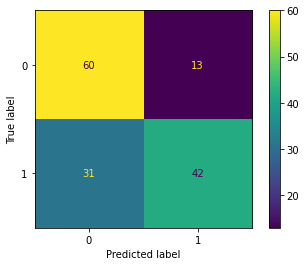

In [126]:
# Plot test confusion matrix
plot_confusion_matrix(clf_linear_svm, normalized_X_test, y_test)

In [127]:
print("Precision ", precision(cm_linear_svm))

Precision  0.7636363636363637


In [128]:
print("Recall:", recall(cm_linear_svm))

Recall: 0.5753424657534246


In [129]:
print("F1:", f1(cm_linear_svm))

F1: 0.65625


In [130]:
tp = np.sum(np.logical_and(y_test == 1, y_pred_linear_svm == 1))
tp

42

In [131]:
tn = np.sum(np.logical_and(y_test == 0, y_pred_linear_svm == 0))
tn

60

In [132]:
fp = np.sum(np.logical_and(y_test == 0, y_pred_linear_svm == 1))
fp

13

In [133]:
fn = np.sum(np.logical_and(y_test == 1, y_pred_linear_svm == 0))
fn

31

In [134]:
print("MCC:", mcc(y_test, y_pred_linear_svm))

MCC: 0.40991702578932726


# SVM - Polynomial Kernel

## Grid search to find the optimal parameters for SVM polynomial kernel

- **C**: it controls the trade-off between maximizing the margin and minimizing the classification error. It's a regularization parameter.
- **coef0**: coefficient of the polynomial kernel function
- **degree**: it specifies the degree of the polynomial kernel function

In [110]:
# Polynomial
param_grid = {'C': np.linspace(0.001, 100, 5),
              'coef0': np.linspace(-10, 10, 5),
              'degree': [2, 3, 4]}

# Create a polynomial kernel and perform grid search
poly_svm = GridSearchCV(SVC(kernel='poly'), param_grid,
                        cv=5, scoring='accuracy', refit=True)
poly_svm.fit(normalized_X_train, y_train)

# Print the best hyperparameters and their corresponding accuracy
best_C_poly = poly_svm.best_params_['C']
best_degree_poly = poly_svm.best_params_['degree']
best_coef0_poly = poly_svm.best_params_['coef0']
best_cv_accuracy_poly = poly_svm.best_score_

print("Best 'C' for Polynomial SVM:", best_C_poly)
print("Best degree:", best_degree_poly)
print("Best coef0:", best_coef0_poly)
print("Best cv accuracy:", best_cv_accuracy_poly)

# Get the best model (trained with the best hyperparameters)
best_poly_svm_model = poly_svm.best_estimator_

GridSearchCV(cv=5, estimator=SVC(kernel='poly'),
             param_grid={'C': array([1.000000e-03, 2.500075e+01, 5.000050e+01, 7.500025e+01,
       1.000000e+02]),
                         'coef0': array([-10.,  -5.,   0.,   5.,  10.]),
                         'degree': [2, 3, 4]},
             scoring='accuracy')

Best 'C' for Polynomial SVM: 0.001
Best degree: 4
Best coef0: 10.0
Best cv accuracy: 0.6973615464994776


### Compute the classification metrics on the cross-validation results

In [111]:
# POSITIVE CLASS (1)


# Use cross_val_predict to get predictions for each fold in cross-validation
y_pred_poly_svm = cross_val_predict(best_poly_svm_model, normalized_X_train, y_train, cv=5)

# Calculate accuracy for each fold
accuracy_scores_poly_svm = cross_val_score(best_poly_svm_model, normalized_X_train, y_train, cv=5, scoring='accuracy')
# Calculate precision, recall and F1 for each fold
# By default, precision, recall and F1 refer to the positive class (1)
precision_scores_1_poly_svm = cross_val_score(best_poly_svm_model, normalized_X_train, y_train, cv=5, scoring='precision')
recall_scores_1_poly_svm = cross_val_score(best_poly_svm_model, normalized_X_train, y_train, cv=5, scoring='recall')
f1_scores_1_poly_svm = cross_val_score(best_poly_svm_model, normalized_X_train, y_train, cv=5, scoring='f1')

# Calculate the mean cross-validation precision and recall
mean_accuracy_poly_svm = np.mean(accuracy_scores_poly_svm)
std_accuracy_poly_svm = np.std(accuracy_scores_poly_svm)
mean_precision_1_poly_svm = np.mean(precision_scores_1_poly_svm)
std_precision_1_poly_svm = np.std(precision_scores_1_poly_svm)
mean_recall_1_poly_svm = np.mean(recall_scores_1_poly_svm)
std_recall_1_poly_svm = np.std(recall_scores_1_poly_svm)
mean_f1_1_poly_svm = np.mean(f1_scores_1_poly_svm)
std_f1_1_poly_svm = np.std(f1_scores_1_poly_svm)


# Print the mean cross-validation precision and recall
print("Mean Cross-Validation Accuracy:", mean_accuracy_poly_svm)
print("Standard Deviation of Accuracy:", std_accuracy_poly_svm)
print("Mean Cross-Validation Precision - 1:", mean_precision_1_poly_svm)
print("Standard Deviation of Precision - 1:", std_precision_1_poly_svm)
print("Mean Cross-Validation Recall - 1:", mean_recall_1_poly_svm)
print("Standard Deviation of Recall - 1:", std_recall_1_poly_svm)
print("Mean Cross-Validation F1-score - 1:", mean_f1_1_poly_svm)
print("Standard Deviation of F1-score - 1:", std_f1_1_poly_svm)

Mean Cross-Validation Accuracy: 0.6973615464994776
Standard Deviation of Accuracy: 0.071238105611192
Mean Cross-Validation Precision - 1: 0.7238406359611294
Standard Deviation of Precision - 1: 0.06049882467652976
Mean Cross-Validation Recall - 1: 0.6338266384778013
Standard Deviation of Recall - 1: 0.13450783349500675
Mean Cross-Validation F1-score - 1: 0.6708047275063767
Standard Deviation of F1-score - 1: 0.09517038225766787


In [112]:
# NEGATIVE CLASS (0)

# 1) PRECISION
# 'make_scorer' defines a custom scoring function for precision of class 0
# 'precision_score' is the scoring function that you want to use as a base
# 'pos_label=0' specifies that you want to calculate precision for class 0
precision_scorer_class0_poly_svm = make_scorer(precision_score, pos_label=0)

# Calculate precision for class 0 (negative class)
precision_scores_0_poly_svm = cross_val_score(best_poly_svm_model, normalized_X_train, y_train, cv=5, scoring=precision_scorer_class0_poly_svm)

# 2) RECALL 
# Define a custom scorer for recall of class 0
recall_scorer_class0_poly_svm = make_scorer(recall_score, pos_label=0)

# Calculate recall for class 0 (negative class)
recall_scores_0_poly_svm = cross_val_score(best_poly_svm_model, normalized_X_train, y_train, cv=5, scoring=recall_scorer_class0_poly_svm)

# 3) F1-SCORE
# Define a custom scorer for F1-score of class 0
f1_scorer_class0_poly_svm = make_scorer(f1_score, pos_label=0)

# Calculate F1-score for class 0 (negative class)
f1_scores_0_poly_svm = cross_val_score(best_poly_svm_model, normalized_X_train, y_train, cv=5, scoring=f1_scorer_class0_poly_svm)

# compute the mean and the standard deviation
mean_precision_0_poly_svm = np.mean(precision_scores_0_poly_svm)
std_precision_0_poly_svm = np.std(precision_scores_0_poly_svm)
mean_recall_0_poly_svm = np.mean(recall_scores_0_poly_svm)
std_recall_0_poly_svm = np.std(recall_scores_0_poly_svm)
mean_f1_0_poly_svm = np.mean(f1_scores_0_poly_svm)
std_f1_0_poly_svm = np.std(f1_scores_0_poly_svm)

print("Mean Cross-Validation Precision - 0:", mean_precision_0_poly_svm)
print("Standard Deviation of Precision - 0:", std_precision_0_poly_svm)
print("Mean Cross-Validation Recall - 0:", mean_recall_0_poly_svm)
print("Standard Deviation of Recall - 0:", std_recall_0_poly_svm)
print("Mean Cross-Validation F1-score: - 0", mean_f1_0_poly_svm)
print("Standard Deviation of F1-score: - 0", std_f1_0_poly_svm)

Mean Cross-Validation Precision - 0: 0.6839251606956742
Standard Deviation of Precision - 0: 0.08395705902610327
Mean Cross-Validation Recall - 0: 0.7608879492600423
Standard Deviation of Recall - 0: 0.0633355606913003
Mean Cross-Validation F1-score: - 0 0.7167488923378391
Standard Deviation of F1-score: - 0 0.05800471521315758


## Polynomial SVM on the test set 

In [113]:
def PolySVM(X_train, X_test, y_train, y_test):
    # Create an instance of the Linear SVM model
    clf = SVC(kernel='poly', C=0.001, degree=4, coef0=10)
    
    # Train the model on the training data
    clf.fit(X_train, y_train)
    
    # Make predictions on the test data
    y_pred = clf.predict(X_test)
    
    # Evaluate the model
    print(classification_report(y_test, y_pred))
    
    return y_pred

In [114]:
y_pred_poly_svm = PolySVM(normalized_X_train, normalized_X_test, y_train, y_test)

              precision    recall  f1-score   support

           0       0.71      0.88      0.79        73
           1       0.84      0.64      0.73        73

    accuracy                           0.76       146
   macro avg       0.78      0.76      0.76       146
weighted avg       0.78      0.76      0.76       146



### Study of the Polynomial SVM function

In [115]:
clf_poly_svm = SVC(kernel='poly', C=0.001, degree=4, coef0=10)

In [116]:
clf_poly_svm.fit(normalized_X_train, y_train)

SVC(C=0.001, coef0=10, degree=4, kernel='poly')

In [117]:
y_pred_poly_svm = clf_poly_svm.predict(normalized_X_test)

In [118]:
y_pred_poly_svm

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1,
       1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1], dtype=int64)

## Evaluate the model with classification metrics 

In [119]:
# Test accuracy 
accuracy_poly_svm = np.mean(y_test == y_pred_poly_svm)
print("Accuracy:", accuracy_poly_svm)

Accuracy: 0.7602739726027398


In [120]:
# build the confusion matrix
cm_poly_svm = confusion_matrix(y_test, y_pred_poly_svm)
print(cm_poly_svm)

[[64  9]
 [26 47]]


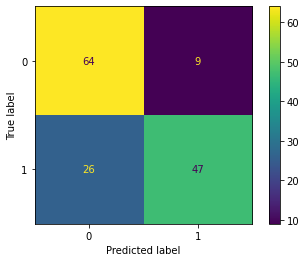

In [121]:
# Plot test confusion matrix
plot_confusion_matrix(clf_poly_svm, normalized_X_test, y_test)

In [122]:
print("Precision ", precision(cm_poly_svm))

Precision  0.8392857142857143


In [123]:
print("Recall:", recall(cm_poly_svm))

Recall: 0.6438356164383562


In [124]:
print("F1:", f1(cm_poly_svm))

F1: 0.7286821705426357


In [125]:
tp = np.sum(np.logical_and(y_test == 1, y_pred_poly_svm == 1))
tp

47

In [126]:
tn = np.sum(np.logical_and(y_test == 0, y_pred_poly_svm == 0))
tn

64

In [127]:
fp = np.sum(np.logical_and(y_test == 0, y_pred_poly_svm == 1))
fp

9

In [128]:
fn = np.sum(np.logical_and(y_test == 1, y_pred_poly_svm == 0))
fn

26

In [129]:
print("MCC:", mcc(y_test, y_pred_poly_svm))

MCC: 0.5352643613280605


# SMV - Radial Kernel

## Grid search to find the optimal parameters for SVM radial kernel

- **C**: it controls the trade-off between maximizing the margin and minimizing the classification error. It's a regularization parameter.
- **Gamma**: kernel coefficient that controls the flexibility of the SVM's decision boundary: 

        1. Small Gamma (e.g., 0.01): The decision boundary is smoother and broader. It considers more data points and is less likely to overfit.
        2. Large Gamma (e.g., 10): The decision boundary is more flexible, curving closely to individual data points. It's more likely to overfit.

In [130]:
# RBF (Radial Basis Function) kernel
param_grid = {'C': np.linspace(0.001, 100, 5),
              'gamma': np.linspace(0.001, 100, 5)}

# Create an RBF kernel SVM and perform grid search
rbf_svm = GridSearchCV(SVC(kernel='rbf'), param_grid, 
                        cv=5, scoring='accuracy', refit=True)
rbf_svm.fit(normalized_X_train, y_train)

# Print the best hyperparameters and their corresponding accuracy
best_C_rbf = rbf_svm.best_params_['C']
best_gamma_rbf = rbf_svm.best_params_['gamma']
best_cv_accuracy_rbf = rbf_svm.best_score_

print("Best 'C' for RBF SVM:", best_C_rbf)
print("Best gamma:", best_gamma_rbf)
print("Best cv accuracy:", best_cv_accuracy_rbf)

# Get the best model (trained with the best hyperparameters)
best_rbf_svm_model = rbf_svm.best_estimator_

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': array([1.000000e-03, 2.500075e+01, 5.000050e+01, 7.500025e+01,
       1.000000e+02]),
                         'gamma': array([1.000000e-03, 2.500075e+01, 5.000050e+01, 7.500025e+01,
       1.000000e+02])},
             scoring='accuracy')

Best 'C' for RBF SVM: 100.0
Best gamma: 0.001
Best cv accuracy: 0.708881922675026


### Compute the classification metrics on the cross-validation results

In [131]:
# Use cross_val_predict to get predictions for each fold in cross-validation
y_pred_radial_svm = cross_val_predict(best_rbf_svm_model, normalized_X_train, y_train, cv=5)

# Calculate accuracy for each fold
accuracy_scores_radial_svm = cross_val_score(best_rbf_svm_model, normalized_X_train, y_train, cv=5, scoring='accuracy')
# Calculate precision, recall and F1 for each fold
# By default, precision, recall and F1 refer to the positive class (1)
precision_scores_1_radial_svm = cross_val_score(best_rbf_svm_model, normalized_X_train, y_train, cv=5, scoring='precision')
recall_scores_1_radial_svm = cross_val_score(best_rbf_svm_model, normalized_X_train, y_train, cv=5, scoring='recall')
f1_scores_1_radial_svm = cross_val_score(best_rbf_svm_model, normalized_X_train, y_train, cv=5, scoring='f1')

# Calculate the mean cross-validation precision and recall
mean_accuracy_radial_svm = np.mean(accuracy_scores_radial_svm)
std_accuracy_radial_svm = np.std(accuracy_scores_radial_svm)
mean_precision_1_radial_svm = np.mean(precision_scores_1_radial_svm)
std_precision_1_radial_svm = np.std(precision_scores_1_radial_svm)
mean_recall_1_radial_svm = np.mean(recall_scores_1_radial_svm)
std_recall_1_radial_svm = np.std(recall_scores_1_radial_svm)
mean_f1_1_radial_svm = np.mean(f1_scores_1_radial_svm)
std_f1_1_radial_svm = np.std(f1_scores_1_radial_svm)


# Print the mean cross-validation precision and recall
print("Mean Cross-Validation Accuracy:", mean_accuracy_radial_svm)
print("Standard Deviation of Accuracy:", std_accuracy_radial_svm)
print("Mean Cross-Validation Precision - 1:", mean_precision_1_radial_svm)
print("Standard Deviation of Precision - 1:", std_precision_1_radial_svm)
print("Mean Cross-Validation Recall - 1:", mean_recall_1_radial_svm)
print("Standard Deviation of Recall - 1:", std_recall_1_radial_svm)
print("Mean Cross-Validation F1-score - 1:", mean_f1_1_radial_svm)
print("Standard Deviation of F1-score - 1:", std_f1_1_radial_svm)

Mean Cross-Validation Accuracy: 0.708881922675026
Standard Deviation of Accuracy: 0.06829284689931353
Mean Cross-Validation Precision - 1: 0.7464328815123035
Standard Deviation of Precision - 1: 0.06018534692846624
Mean Cross-Validation Recall - 1: 0.629492600422833
Standard Deviation of Recall - 1: 0.13709426177037254
Mean Cross-Validation F1-score - 1: 0.6768926905029191
Standard Deviation of F1-score - 1: 0.09793749592180857


In [132]:
# NEGATIVE CLASS (0)

# 1) PRECISION
# 'make_scorer' defines a custom scoring function for precision of class 0
# 'precision_score' is the scoring function that you want to use as a base
# 'pos_label=0' specifies that you want to calculate precision for class 0
precision_scorer_class0_radial_svm = make_scorer(precision_score, pos_label=0)

# Calculate precision for class 0 (negative class)
precision_scores_0_radial_svm = cross_val_score(best_rbf_svm_model, normalized_X_train, y_train, cv=5, scoring=precision_scorer_class0_radial_svm)

# 2) RECALL 
# Define a custom scorer for recall of class 0
recall_scorer_class0_radial_svm = make_scorer(recall_score, pos_label=0)

# Calculate recall for class 0 (negative class)
recall_scores_0_radial_svm = cross_val_score(best_rbf_svm_model, normalized_X_train, y_train, cv=5, scoring=recall_scorer_class0_radial_svm)

# 3) F1-SCORE
# Define a custom scorer for F1-score of class 0
f1_scorer_class0_radial_svm = make_scorer(f1_score, pos_label=0)

# Calculate F1-score for class 0 (negative class)
f1_scores_0_radial_svm = cross_val_score(best_rbf_svm_model, normalized_X_train, y_train, cv=5, scoring=f1_scorer_class0_radial_svm)

# compute the mean and the standard deviation
mean_precision_0_radial_svm = np.mean(precision_scores_0_radial_svm)
std_precision_0_radial_svm = np.std(precision_scores_0_radial_svm)
mean_recall_0_radial_svm = np.mean(recall_scores_0_radial_svm)
std_recall_0_radial_svm = np.std(recall_scores_0_radial_svm)
mean_f1_0_radial_svm = np.mean(f1_scores_0_radial_svm)
std_f1_0_radial_svm = np.std(f1_scores_0_radial_svm)

print("Mean Cross-Validation Precision - 0:", mean_precision_0_radial_svm)
print("Standard Deviation of Precision - 0:", std_precision_0_radial_svm)
print("Mean Cross-Validation Recall - 0:", mean_recall_0_radial_svm)
print("Standard Deviation of Recall - 0:", std_recall_0_radial_svm)
print("Mean Cross-Validation F1-score: - 0", mean_f1_0_radial_svm)
print("Standard Deviation of F1-score: - 0", std_f1_0_radial_svm)

Mean Cross-Validation Precision - 0: 0.6894092492872982
Standard Deviation of Precision - 0: 0.07927032413824348
Mean Cross-Validation Recall - 0: 0.7886892177589852
Standard Deviation of Recall - 0: 0.05764386051636559
Mean Cross-Validation F1-score: - 0 0.7320095438705987
Standard Deviation of F1-score: - 0 0.05054878615925837


### Radial SVM on the test set 

In [133]:
def RadialSVM(X_train, X_test, y_train, y_test):
    # Create an instance of the Linear SVM model
    clf = SVC(kernel='rbf', C=100, gamma=0.001)
    
    # Train the model on the training data
    clf.fit(X_train, y_train)
    
    # Make predictions on the test data
    y_pred = clf.predict(X_test)
    
    # Evaluate the model
    print(classification_report(y_test, y_pred))
    
    return y_pred

In [134]:
y_pred_radial_svm = RadialSVM(normalized_X_train, normalized_X_test, y_train, y_test)

              precision    recall  f1-score   support

           0       0.68      0.86      0.76        73
           1       0.81      0.60      0.69        73

    accuracy                           0.73       146
   macro avg       0.75      0.73      0.73       146
weighted avg       0.75      0.73      0.73       146



### Study of the Radial SVM function

In [135]:
clf_radial_svm = SVC(kernel='rbf', C=100, gamma=0.001)

In [136]:
clf_radial_svm.fit(normalized_X_train, y_train)

SVC(C=100, gamma=0.001)

In [137]:
y_pred_radial_svm = clf_radial_svm.predict(normalized_X_test)

In [138]:
y_pred_radial_svm

array([1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1], dtype=int64)

## Evaluate the model with classification metrics 

In [139]:
# Test accuracy 
accuracy_radial_svm = np.mean(y_test == y_pred_radial_svm)
print("Accuracy:", accuracy_radial_svm)

Accuracy: 0.7328767123287672


In [140]:
# build the confusion matrix
cm_radial_svm = confusion_matrix(y_test, y_pred_radial_svm)
print(cm_radial_svm)

[[63 10]
 [29 44]]


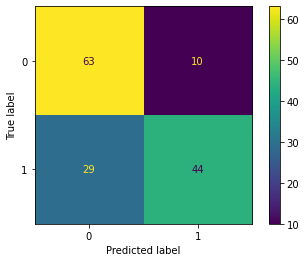

In [141]:
# Plot test confusion matrix
plot_confusion_matrix(clf_radial_svm, normalized_X_test, y_test)

In [142]:
print("Precision ", precision(cm_radial_svm))

Precision  0.8148148148148148


In [143]:
print("Recall:", recall(cm_radial_svm))

Recall: 0.6027397260273972


In [144]:
print("F1:", f1(cm_radial_svm))

F1: 0.6929133858267718


In [145]:
tp = np.sum(np.logical_and(y_test == 1, y_pred_radial_svm == 1))
tp

44

In [146]:
tn = np.sum(np.logical_and(y_test == 0, y_pred_radial_svm == 0))
tn

63

In [147]:
fp = np.sum(np.logical_and(y_test == 0, y_pred_radial_svm == 1))
fp

10

In [148]:
fn = np.sum(np.logical_and(y_test == 1, y_pred_radial_svm == 0))
fn

29

In [149]:
print("MCC:", mcc(y_test, y_pred_radial_svm))

MCC: 0.4823787007632908


# Random Forest

## Grid search to find the optimal parameters for Random Forest 

Perform a GridSearch for the mtry parameter of Random Forest.
The GridSearchCV will automatically perform cross-validation, evaluate the performance of the Random Forest with different 'max_features' values, and return the best parameter value based on the chosen scoring metric.

**NOTE 1:** the 'max_features' parameter determines the number of features randomly selected at each split point when building a tree in a random forest: a smaller 'max_features' value leads to more randomness and diversity among the trees, while a larger 'max_features' value reduces the randomness and increases the correlation between the trees.

**NOTE 2:** the Out-Of-Bag (OOB) score is a measure of a model's accuracy. It is calculated based on out-of-bag samples, which are the data points that were not used during training for each tree in the Random Forest. These out-of-bag samples are used to estimate the model's accuracy without the need for a separate validation set. The OOB score is a valuable metric because it provides an estimate of how well the Random Forest model is likely to perform on unseen data.

In [135]:
from sklearn.ensemble import RandomForestClassifier

# Define the Random Forest Classifier
rf = RandomForestClassifier(random_state=123, oob_score=True)

# Define the grid of parameters to search over, including max_features and n_estimators
param_grid = {
    'max_features': [15, 18, 20, 25, 30, 31, 32, 33, 40, 45, 50],
    'n_estimators': [100, 200, 300, 400]  # Specify the values of n_estimators to try
}

# Create an instance of GridSearchCV and pass the Random Forest classifier, parameter grid, and desired number of cross-validation folds
grid_search_random_forest = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5)

# Fit the Grid search object to your data
grid_search_random_forest.fit(normalized_X_train, y_train)

print("Best parameters:", grid_search_random_forest.best_params_)
print("Best cross-validation score (accuracy):", grid_search_random_forest.best_score_)
print("OOB score of best model:", grid_search_random_forest.best_estimator_.oob_score_)


GridSearchCV(cv=5,
             estimator=RandomForestClassifier(oob_score=True, random_state=123),
             param_grid={'max_features': [15, 18, 20, 25, 30, 31, 32, 33, 40,
                                          45, 50],
                         'n_estimators': [100, 200, 300, 400]})

Best parameters: {'max_features': 15, 'n_estimators': 200}
Best cross-validation score (accuracy): 0.6835945663531872
OOB score of best model: 0.6926605504587156


### Compute the classification metrics on the cross-validation results 

In [136]:
# POSITIVE CLASS (1)

# After fitting the grid search, calculate metrics using cross_val_predict
best_rf_model = grid_search_random_forest.best_estimator_  # Get the best Random Forest model with the optimal parameters

# Use cross_val_predict to get predictions for each fold in cross-validation
y_pred_rf = cross_val_predict(best_rf_model, normalized_X_train, y_train, cv=5)

# Calculate accuracy for each fold
accuracy_scores_rf = cross_val_score(best_rf_model, normalized_X_train, y_train, cv=5, scoring='accuracy')
# Calculate precision, recall and F1 for each fold
# By default, precision, recall and F1 refer to the positive class (1)
precision_scores_1_rf = cross_val_score(best_rf_model, normalized_X_train, y_train, cv=5, scoring='precision')
recall_scores_1_rf = cross_val_score(best_rf_model, normalized_X_train, y_train, cv=5, scoring='recall')
f1_scores_1_rf = cross_val_score(best_rf_model, normalized_X_train, y_train, cv=5, scoring='f1')

# Calculate the mean cross-validation precision and recall
mean_accuracy_rf = np.mean(accuracy_scores_rf)
std_accuracy_rf = np.std(accuracy_scores_rf)
mean_precision_1_rf = np.mean(precision_scores_1_rf)
std_precision_1_rf = np.std(precision_scores_1_rf)
mean_recall_1_rf = np.mean(recall_scores_1_rf)
std_recall_1_rf = np.std(recall_scores_1_rf)
mean_f1_1_rf = np.mean(f1_scores_1_rf)
std_f1_1_rf = np.std(f1_scores_1_rf)


# Print the mean cross-validation precision and recall
print("Mean Cross-Validation Accuracy:", mean_accuracy_rf)
print("Standard Deviation of Accuracy:", std_accuracy_rf)
print("Mean Cross-Validation Precision - 1:", mean_precision_1_rf)
print("Standard Deviation of Precision - 1:", std_precision_1_rf)
print("Mean Cross-Validation Recall - 1:", mean_recall_1_rf)
print("Standard Deviation of Recall - 1:", std_recall_1_rf)
print("Mean Cross-Validation F1-score - 1:", mean_f1_1_rf)
print("Standard Deviation of F1-score - 1:", std_f1_1_rf)

Mean Cross-Validation Accuracy: 0.6835945663531872
Standard Deviation of Accuracy: 0.053938742118079364
Mean Cross-Validation Precision - 1: 0.7756181318681319
Standard Deviation of Precision - 1: 0.07294447532125878
Mean Cross-Validation Recall - 1: 0.5187103594080338
Standard Deviation of Recall - 1: 0.08597180814227588
Mean Cross-Validation F1-score - 1: 0.6185001184553423
Standard Deviation of F1-score - 1: 0.0741846991011234


In [137]:
# NEGATIVE CLASS (0)

# 1) PRECISION
# 'make_scorer' defines a custom scoring function for precision of class 0
# 'precision_score' is the scoring function that you want to use as a base
# 'pos_label=0' specifies that you want to calculate precision for class 0
precision_scorer_class0_rf = make_scorer(precision_score, pos_label=0)

# Calculate precision for class 0 (negative class)
precision_scores_0_rf = cross_val_score(best_rf_model, normalized_X_train, y_train, cv=5, scoring=precision_scorer_class0_rf)

# 2) RECALL 
# Define a custom scorer for recall of class 0
recall_scorer_class0_rf = make_scorer(recall_score, pos_label=0)

# Calculate recall for class 0 (negative class)
recall_scores_0_rf = cross_val_score(best_rf_model, normalized_X_train, y_train, cv=5, scoring=recall_scorer_class0_rf)

# 3) F1-SCORE
# Define a custom scorer for F1-score of class 0
f1_scorer_class0_rf = make_scorer(f1_score, pos_label=0)

# Calculate F1-score for class 0 (negative class)
f1_scores_0_rf = cross_val_score(best_rf_model, normalized_X_train, y_train, cv=5, scoring=f1_scorer_class0_rf)

# compute the mean and the standard deviation
mean_precision_0_rf = np.mean(precision_scores_0_rf)
std_precision_0_rf = np.std(precision_scores_0_rf)
mean_recall_0_rf = np.mean(recall_scores_0_rf)
std_recall_0_rf = np.std(recall_scores_0_rf)
mean_f1_0_rf = np.mean(f1_scores_0_rf)
std_f1_0_rf = np.std(f1_scores_0_rf)

print("Mean Cross-Validation Precision - 0:", mean_precision_0_rf)
print("Standard Deviation of Precision - 0:", std_precision_0_rf)
print("Mean Cross-Validation Recall - 0:", mean_recall_0_rf)
print("Standard Deviation of Recall - 0:", std_recall_0_rf)
print("Mean Cross-Validation F1-score: - 0", mean_f1_0_rf)
print("Standard Deviation of F1-score: - 0", std_f1_0_rf)

Mean Cross-Validation Precision - 0: 0.6399193213080583
Standard Deviation of Precision - 0: 0.04802284290499493
Mean Cross-Validation Recall - 0: 0.8480972515856238
Standard Deviation of Recall - 0: 0.05498109299532083
Mean Cross-Validation F1-score: - 0 0.7284836115197377
Standard Deviation of F1-score: - 0 0.04411697094350112


In [138]:
def RF(X_train, X_test, y_train, y_test):
    
    clf = RandomForestClassifier(max_features=15, n_estimators=200, random_state=123) # The default value for max_features in scikit-learn's RandomForestClassifier is "auto", which means that the number of features considered for splitting at each tree node is equal to the square root of the total number of features.

    clf.fit(X_train, y_train.values.ravel())

    y_pred = clf.predict(X_test)

    # Valutazione del modello
    print(classification_report(y_test, y_pred))
    
    return y_pred

In [139]:
y_pred_rf = RF(normalized_X_train, normalized_X_test, y_train, y_test)

              precision    recall  f1-score   support

           0       0.64      0.82      0.72        73
           1       0.75      0.53      0.62        73

    accuracy                           0.68       146
   macro avg       0.69      0.68      0.67       146
weighted avg       0.69      0.68      0.67       146



### Study the Random Forest function

In [140]:
clf_rf = RandomForestClassifier(max_features=33, n_estimators=300, random_state=123)

In [141]:
clf_rf.fit(normalized_X_train, y_train)

RandomForestClassifier(max_features=33, n_estimators=300, random_state=123)

In [142]:
y_pred_rf = clf_rf.predict(normalized_X_test)

In [143]:
y_pred_rf

array([1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1,
       1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1], dtype=int64)

## Evaluate the model with classification metrics 

In [144]:
# Test accuracy 
accuracy_rf = np.mean(y_test == y_pred_rf)
print("Accuracy:", accuracy_rf)

Accuracy: 0.684931506849315


In [145]:
# build the confusion matrix
cm_rf = confusion_matrix(y_test, y_pred_rf)
print(cm_rf)

[[60 13]
 [33 40]]


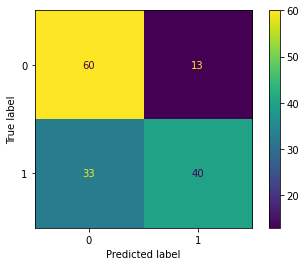

In [146]:
# Plot test confusion matrix
plot_confusion_matrix(clf_rf, normalized_X_test, y_test)

In [147]:
print("Precision ", precision(cm_rf))

Precision  0.7547169811320755


In [148]:
print("Recall:", recall(cm_rf))

Recall: 0.547945205479452


In [149]:
print("F1:", f1(cm_rf))

F1: 0.6349206349206349


In [150]:
tp = np.sum(np.logical_and(y_test == 1, y_pred_rf == 1))
tp

40

In [151]:
tn = np.sum(np.logical_and(y_test == 0, y_pred_rf == 0))
tn

60

In [152]:
fp = np.sum(np.logical_and(y_test == 0, y_pred_rf == 1))
fp

13

In [153]:
fn = np.sum(np.logical_and(y_test == 1, y_pred_rf == 0))
fn

33

In [154]:
print("MCC:", mcc(y_test, y_pred_rf))

MCC: 0.38457792785444406


# Extreme Gradient Boosting (XGBoost)

## Grid search to find the optimal parameters for XGBoost

### Boosting
In boosting, the trees are built sequentially such that each subsequent tree aims to reduce the errors of the previous tree. Each tree learns from its predecessors and updates the residual errors. Hence, the tree that grows next in the sequence will learn from an updated version of the residuals.

The base learners in boosting are weak learners in which the bias is high, and the predictive power is just a tad better than random guessing. Each of these weak learners contributes some vital information for prediction, enabling the boosting technique to produce a strong learner by effectively combining these weak learners. The final strong learner brings down both the bias and the variance.

In contrast to bagging techniques like Random Forest, in which trees are grown to their maximum extent, boosting makes use of trees with fewer splits. Such small trees, which are not very deep, are highly interpretable. Parameters like the number of trees or iterations, the rate at which the gradient boosting learns, and the depth of the tree, could be optimally selected through validation techniques like k-fold cross validation. Having a large number of trees might lead to overfitting. So, it is necessary to carefully choose the stopping criteria for boosting.

XGBoost offers a wide range of **hyperparameters** that you can fine-tune to optimize the model's performance. Here are some of the most commonly tuned hyperparameters in XGBoost:

1. **Learning Rate (eta)**:
    - Parameter name: eta
    - Description: Learning rate controls the step size at each iteration          while moving toward a minimum of a loss function. Lower values make the      optimization more robust but require more boosting rounds
    
    
2. **Maximum Depth of Trees (max_depth):**
    - Parameter name: max_depth
    - Description: It specifies the maximum depth of the individual trees. Deeper trees can model more complex relationships but are more prone to overfitting.
    
    
3. **Number of Trees (n_estimators):**
    - Parameter name: n_estimators
    - Description: It determines the number of boosting rounds (trees) to train. More rounds can improve performance, but you should be cautious of overfitting.
    
    
4. **Column Subsampling (colsample_bytree and colsample_bylevel):**
    - Parameter name: colsample_bytree and colsample_bylevel
    - Description: These parameters control the fraction of features (columns) to be randomly sampled for building each tree and each level of a tree, respectively.
    
    
5. **Regularization Parameter (gamma):**
    - Parameter names: gamma
    - Description: used for controlling regularization. The gamma hyperparameter is related to the minimum loss reduction required to make a further partition on a leaf node of the tree. (default value = 0 --> no regularization is applied and the tree can grow as deep as necessary to fit the training data)

In [155]:
import xgboost as xgb

# Define the parameter grid for grid search
param_grid = {
    'learning_rate': [0.01, 0.1, 0.3],
    'max_depth': [5, 6, 8, 9],
    'n_estimators': [100, 200, 300],
    #'colsample_bytree': [0.5, 0.75, 1.0],
    #'gamma': [0, 0.1, 0.2] 
}

# Create an instance of the XGBoost classifier
xgb_classifier = xgb.XGBClassifier(objective='binary:logistic')

# Create the GridSearchCV object
grid_search_xgb = GridSearchCV(estimator=xgb_classifier, param_grid=param_grid, cv=5, scoring='accuracy')

# Fit the grid search to your training data
grid_search_xgb.fit(X_train, y_train)

# Print the best hyperparameters and their corresponding accuracy
best_learning_rate = grid_search_xgb.best_params_['learning_rate']
best_max_depth = grid_search_xgb.best_params_['max_depth']
best_n_estimators = grid_search_xgb.best_params_['n_estimators']
#best_colsample_bytree = grid_search_xgb.best_params_['colsample_bytree']

best_accuracy = grid_search_xgb.best_score_

print("Best Learning Rate:", best_learning_rate)
print("Best Max Depth:", best_max_depth)
print("Best Number of Trees:", best_n_estimators)
#print("Best Column Subsampling:", best_colsample_bytree)
print("Best Accuracy:", best_accuracy)

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=Non

Best Learning Rate: 0.3
Best Max Depth: 8
Best Number of Trees: 200
Best Accuracy: 0.7202978056426332


### Compute the classification metrics on the cross-validation results 

In [156]:
# POSITIVE CLASS (1)

# After fitting the grid search, calculate metrics using cross_val_predict
best_xgb_model = grid_search_xgb.best_estimator_  # Get the best xgb model with the optimal parameters

# Use cross_val_predict to get predictions for each fold in cross-validation
y_pred_xgb = cross_val_predict(best_xgb_model, normalized_X_train, y_train, cv=5)

# Calculate accuracy for each fold
accuracy_scores_xgb = cross_val_score(best_xgb_model, normalized_X_train, y_train, cv=5, scoring='accuracy')
# Calculate precision, recall and F1 for each fold
# By default, precision, recall and F1 refer to the positive class (1)
precision_scores_1_xgb = cross_val_score(best_xgb_model, normalized_X_train, y_train, cv=5, scoring='precision')
recall_scores_1_xgb = cross_val_score(best_xgb_model, normalized_X_train, y_train, cv=5, scoring='recall')
f1_scores_1_xgb = cross_val_score(best_xgb_model, normalized_X_train, y_train, cv=5, scoring='f1')

# Calculate the mean cross-validation precision and recall
mean_accuracy_xgb = np.mean(accuracy_scores_xgb)
std_accuracy_xgb = np.std(accuracy_scores_xgb)
mean_precision_1_xgb = np.mean(precision_scores_1_xgb)
std_precision_1_xgb = np.std(precision_scores_1_xgb)
mean_recall_1_xgb = np.mean(recall_scores_1_xgb)
std_recall_1_xgb = np.std(recall_scores_1_xgb)
mean_f1_1_xgb = np.mean(f1_scores_1_xgb)
std_f1_1_xgb = np.std(f1_scores_1_xgb)


# Print the mean cross-validation precision and recall
print("Mean Cross-Validation Accuracy:", mean_accuracy_xgb)
print("Standard Deviation of Accuracy:", std_accuracy_xgb)
print("Mean Cross-Validation Precision - 1:", mean_precision_1_xgb)
print("Standard Deviation of Precision - 1:", std_precision_1_xgb)
print("Mean Cross-Validation Recall - 1:", mean_recall_1_xgb)
print("Standard Deviation of Recall - 1:", std_recall_1_xgb)
print("Mean Cross-Validation F1-score - 1:", mean_f1_1_xgb)
print("Standard Deviation of F1-score - 1:", std_f1_1_xgb)

Mean Cross-Validation Accuracy: 0.7202978056426332
Standard Deviation of Accuracy: 0.07127457509092675
Mean Cross-Validation Precision - 1: 0.7170828688435626
Standard Deviation of Precision - 1: 0.053676533354602846
Mean Cross-Validation Recall - 1: 0.7211416490486257
Standard Deviation of Recall - 1: 0.11398545131795554
Mean Cross-Validation F1-score - 1: 0.7172860670655605
Standard Deviation of F1-score - 1: 0.08283539273747549


In [157]:
# NEGATIVE CLASS (0)

# 1) PRECISION
# 'make_scorer' defines a custom scoring function for precision of class 0
# 'precision_score' is the scoring function that you want to use as a base
# 'pos_label=0' specifies that you want to calculate precision for class 0
precision_scorer_class0_xgb = make_scorer(precision_score, pos_label=0)

# Calculate precision for class 0 (negative class)
precision_scores_0_xgb = cross_val_score(best_xgb_model, normalized_X_train, y_train, cv=5, scoring=precision_scorer_class0_xgb)

# 2) RECALL 
# Define a custom scorer for recall of class 0
recall_scorer_class0_xgb = make_scorer(recall_score, pos_label=0)

# Calculate recall for class 0 (negative class)
recall_scores_0_xgb = cross_val_score(best_xgb_model, normalized_X_train, y_train, cv=5, scoring=recall_scorer_class0_xgb)

# 3) F1-SCORE
# Define a custom scorer for F1-score of class 0
f1_scorer_class0_xgb = make_scorer(f1_score, pos_label=0)

# Calculate F1-score for class 0 (negative class)
f1_scores_0_xgb = cross_val_score(best_xgb_model, normalized_X_train, y_train, cv=5, scoring=f1_scorer_class0_xgb)

# compute the mean and the standard deviation
mean_precision_0_xgb = np.mean(precision_scores_0_xgb)
std_precision_0_xgb = np.std(precision_scores_0_xgb)
mean_recall_0_xgb = np.mean(recall_scores_0_xgb)
std_recall_0_xgb = np.std(recall_scores_0_xgb)
mean_f1_0_xgb = np.mean(f1_scores_0_xgb)
std_f1_0_xgb = np.std(f1_scores_0_xgb)

print("Mean Cross-Validation Precision - 0:", mean_precision_0_xgb)
print("Standard Deviation of Precision - 0:", std_precision_0_xgb)
print("Mean Cross-Validation Recall - 0:", mean_recall_0_xgb)
print("Standard Deviation of Recall - 0:", std_recall_0_xgb)
print("Mean Cross-Validation F1-score: - 0", mean_f1_0_xgb)
print("Standard Deviation of F1-score: - 0", std_f1_0_xgb)

Mean Cross-Validation Precision - 0: 0.7274228495533739
Standard Deviation of Precision - 0: 0.08939526733293217
Mean Cross-Validation Recall - 0: 0.7197674418604652
Standard Deviation of Recall - 0: 0.046980626020627275
Mean Cross-Validation F1-score: - 0 0.7217942002517457
Standard Deviation of F1-score: - 0 0.06278781615527776


In [158]:
def XGBoost(X_train, X_test, y_train, y_test):
    
    clf = xgb.XGBClassifier(objective="binary:logistic", learning_rate=0.3, n_estimators=200, max_depth=8, random_state=123) 

    clf.fit(X_train, y_train.values.ravel())

    y_pred = clf.predict(X_test)

    # Valutazione del modello
    print(classification_report(y_test, y_pred))
    
    return y_pred

In [159]:
y_pred_xgb = XGBoost(normalized_X_train, normalized_X_test, y_train, y_test)

              precision    recall  f1-score   support

           0       0.76      0.79      0.78        73
           1       0.79      0.75      0.77        73

    accuracy                           0.77       146
   macro avg       0.77      0.77      0.77       146
weighted avg       0.77      0.77      0.77       146



### Study the eXtreme Gradient Boosting function

In [160]:
clf_xgb = xgb.XGBClassifier(objective="binary:logistic", learning_rate=0.3, n_estimators=200, max_depth=8, random_state=123) 

In [161]:
clf_xgb.fit(normalized_X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.3, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=8, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=200, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=123, ...)

In [162]:
y_pred_xgb = clf_xgb.predict(normalized_X_test)

## Evaluate the model with classification metrics 

In [163]:
# Test accuracy 
accuracy_xgb = np.mean(y_test == y_pred_xgb)
print("Accuracy:", accuracy_xgb)

Accuracy: 0.773972602739726


In [164]:
# build the confusion matrix
cm_xgb = confusion_matrix(y_test, y_pred_xgb)
print(cm_xgb)

[[58 15]
 [18 55]]


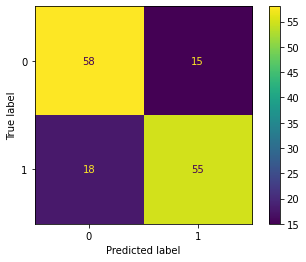

In [165]:
# Plot test confusion matrix
plot_confusion_matrix(clf_xgb, normalized_X_test, y_test)

In [166]:
print("Precision ", precision(cm_xgb))

Precision  0.7857142857142857


In [167]:
print("Recall:", recall(cm_xgb))

Recall: 0.7534246575342466


In [168]:
print("F1:", f1(cm_xgb))

F1: 0.7692307692307693


In [169]:
tp = np.sum(np.logical_and(y_test == 1, y_pred_xgb == 1))
tp

55

In [170]:
tn = np.sum(np.logical_and(y_test == 0, y_pred_xgb == 0))
tn

58

In [171]:
fp = np.sum(np.logical_and(y_test == 0, y_pred_xgb == 1))
fp

15

In [172]:
fn = np.sum(np.logical_and(y_test == 1, y_pred_xgb == 0))
fn

18

In [173]:
print("MCC:", mcc(y_test, y_pred_xgb))

MCC: 0.5484084971070818
